# Análisis EDA


**Diccionario de Datos**

1. ID: Identificador
2. MORA60: Indicador mora>60 días en el transcurso de un año luego de haberle otorgado el crédito (0: No tuvo mora 60, 1:Sí tuvo mora 60).
3. VAR01:	Número de días de atraso máximo durante los 12 meses antes de la aprobación del crédito.
4. VAR02:	Situación de la casa (alquilada, familiar, propia, otras)
5. VAR03:	Edad
6. VAR04:	Fecha ingreso al empleo.
7. VAR05:	Máxima antigüedad con Tarjeta de crédito en el Sistema Financiero (en meses).
8. VAR06:	Número de meses con algún producto Pasivo (ahorro) durante los 12 meses antes de la aprobación del crédito.
9. VAR07:	Ingreso mensual.
10. VAR08:	Monto de Línea de crédito Tarjeta de Crédito en el Sistema Financiero.
11. VAR09:	Monto de Saldo deudor promedio total en el Sistema Financiero.
12. VAR10:	Score con el que fue aprobada la Tarjeta de crédito en el Banco.
13. VAR11:	Número de veces con Abono de Pago de Haberes en el Banco durante los 12 meses antes de la aprobación del crédito.
14. VAR12	Zona geográfica.
15. VAR13	Máxima clasificación de Riesgos SBS  durante los 12 meses antes de la aprobación del crédito (0: Normal, 1: CPP, 2: Deficiente, 3: Dudoso, 4: Pérdida).
16. VAR14	Nivel educativo.

Churn is a one of the biggest problem in  the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%.

In [ ]:
#Importamos librerias necesarias
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

**Let us read the data file in the python notebook**

In [ ]:
df = pd.read_excel('/content/caso_TC.XLSX')

In [ ]:
df.head(3)

,ID,MORA60,VAR01,VAR02,VAR03,VAR04,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14
0,1,0,235,FAMILIAR,30,2007-06-01,93,5,3500.0,0.00,0.00,214,5,Lima,4,PROFESIONAL
1,2,0,18,FAMILIAR,32,2005-02-01,9,12,900.0,1824.67,1933.75,175,12,La Libertad,1,TECNICO
2,3,0,0,FAMILIAR,26,2003-08-01,8,2,2400.0,2797.38,188.29,187,0,Lima,0,PROFESIONAL


# **Limpieza incial de datos**

 Paso1: Exploración inicial de datos

In [ ]:
df.columns.values

array(['ID', 'MORA60', 'VAR01', 'VAR02', 'VAR03', 'VAR04', 'VAR05',
       'VAR06', 'VAR07', 'VAR08', 'VAR09', 'VAR10', 'VAR11', 'VAR12',
       'VAR13', 'VAR14'], dtype=object)

In [ ]:
## Total de columnas
df.shape

(5000, 16)

In [ ]:
#información sobre las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      5000 non-null   int64         
 1   MORA60  5000 non-null   int64         
 2   VAR01   5000 non-null   int64         
 3   VAR02   5000 non-null   object        
 4   VAR03   5000 non-null   int64         
 5   VAR04   5000 non-null   datetime64[ns]
 6   VAR05   5000 non-null   int64         
 7   VAR06   5000 non-null   int64         
 8   VAR07   5000 non-null   float64       
 9   VAR08   5000 non-null   float64       
 10  VAR09   5000 non-null   float64       
 11  VAR10   5000 non-null   int64         
 12  VAR11   5000 non-null   int64         
 13  VAR12   5000 non-null   object        
 14  VAR13   5000 non-null   int64         
 15  VAR14   5000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(9), object(3)
memory usage: 625.1+ KB


In [ ]:
df.columns.values

array(['ID', 'MORA60', 'VAR01', 'VAR02', 'VAR03', 'VAR04', 'VAR05',
       'VAR06', 'VAR07', 'VAR08', 'VAR09', 'VAR10', 'VAR11', 'VAR12',
       'VAR13', 'VAR14'], dtype=object)

In [ ]:
df.dtypes

,0
ID,int64
MORA60,int64
VAR01,int64
VAR02,object
VAR03,int64
VAR04,datetime64[ns]
VAR05,int64
VAR06,int64
VAR07,float64
VAR08,float64


In [ ]:
df.dtypes

,0
ID,int64
MORA60,int64
VAR01,int64
VAR02,object
VAR03,int64
VAR04,datetime64[ns]
VAR05,int64
VAR06,int64
VAR07,float64
VAR08,float64


**Paso2:**

Identificación de valores nulos

**Let's explore the data to see if there are any missing values.**

In [ ]:
# Verificar los valores nulos
df.isnull().sum()

,0
ID,0
MORA60,0
VAR01,0
VAR02,0
VAR03,0
VAR04,0
VAR05,0
VAR06,0
VAR07,0
VAR08,0


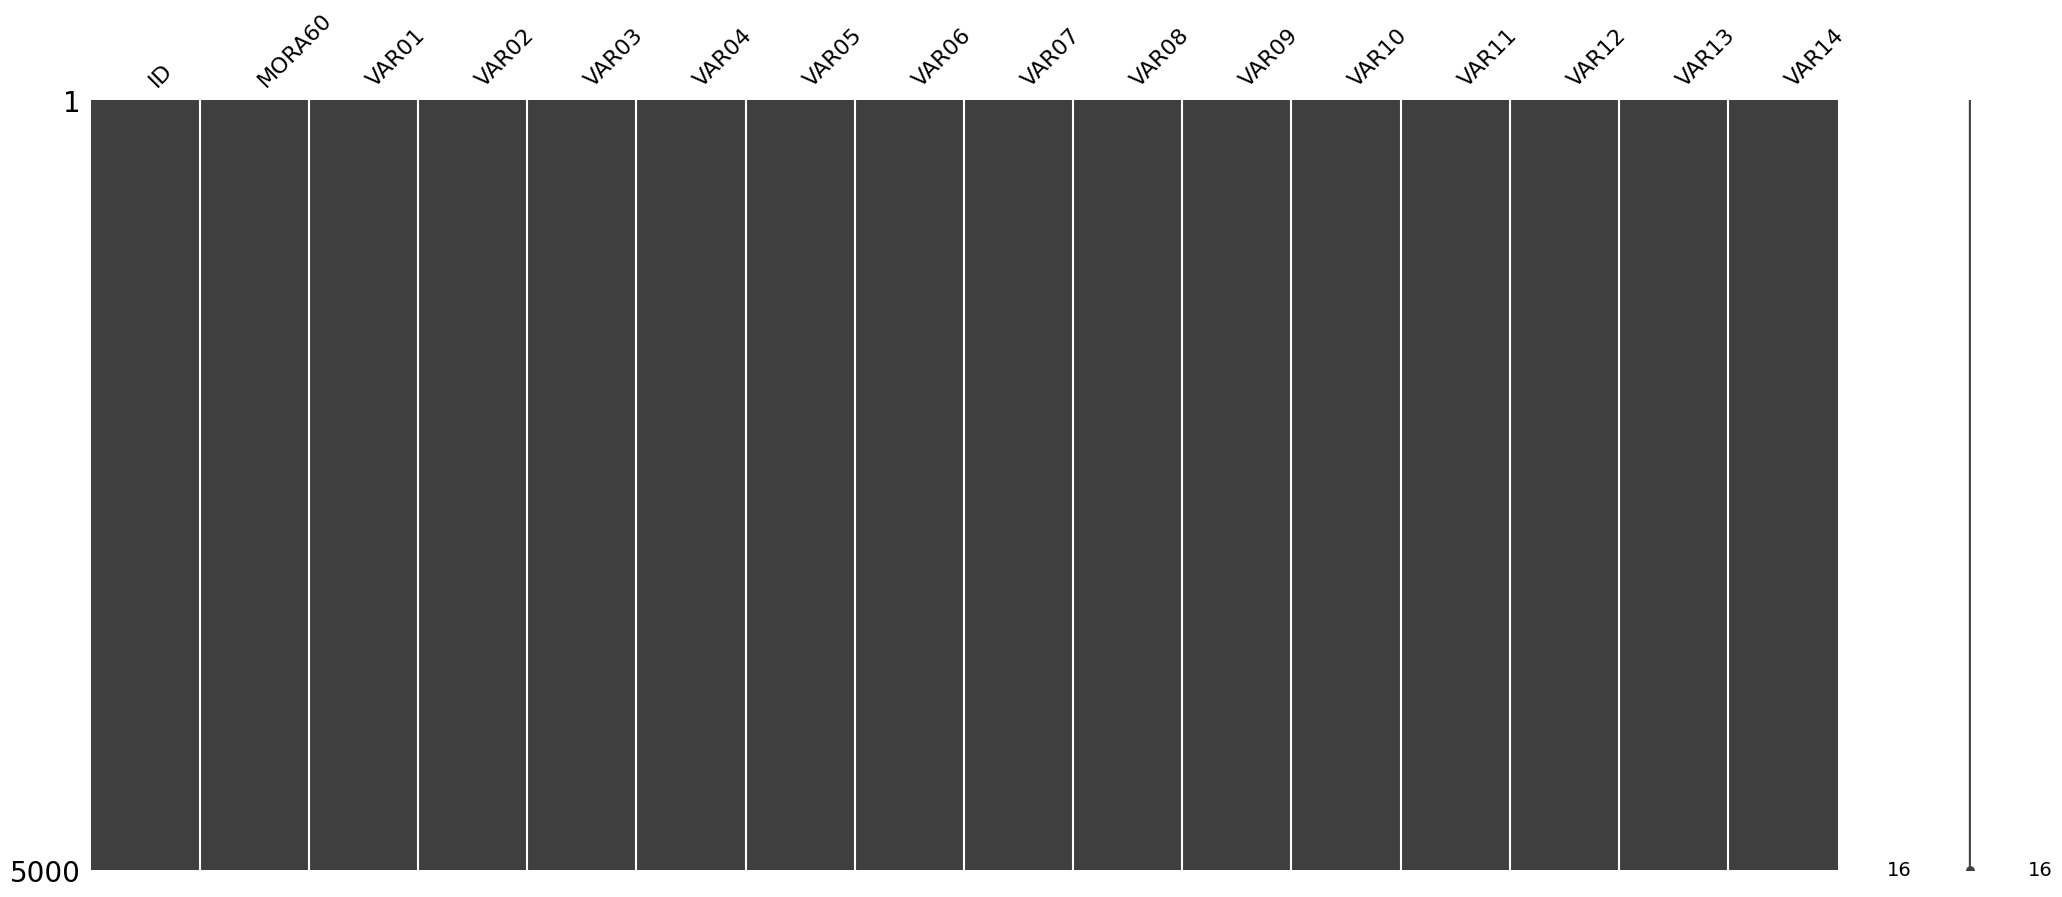

In [ ]:
# Visualize missing values as a matrix
msno.matrix(df);

<Axes: >

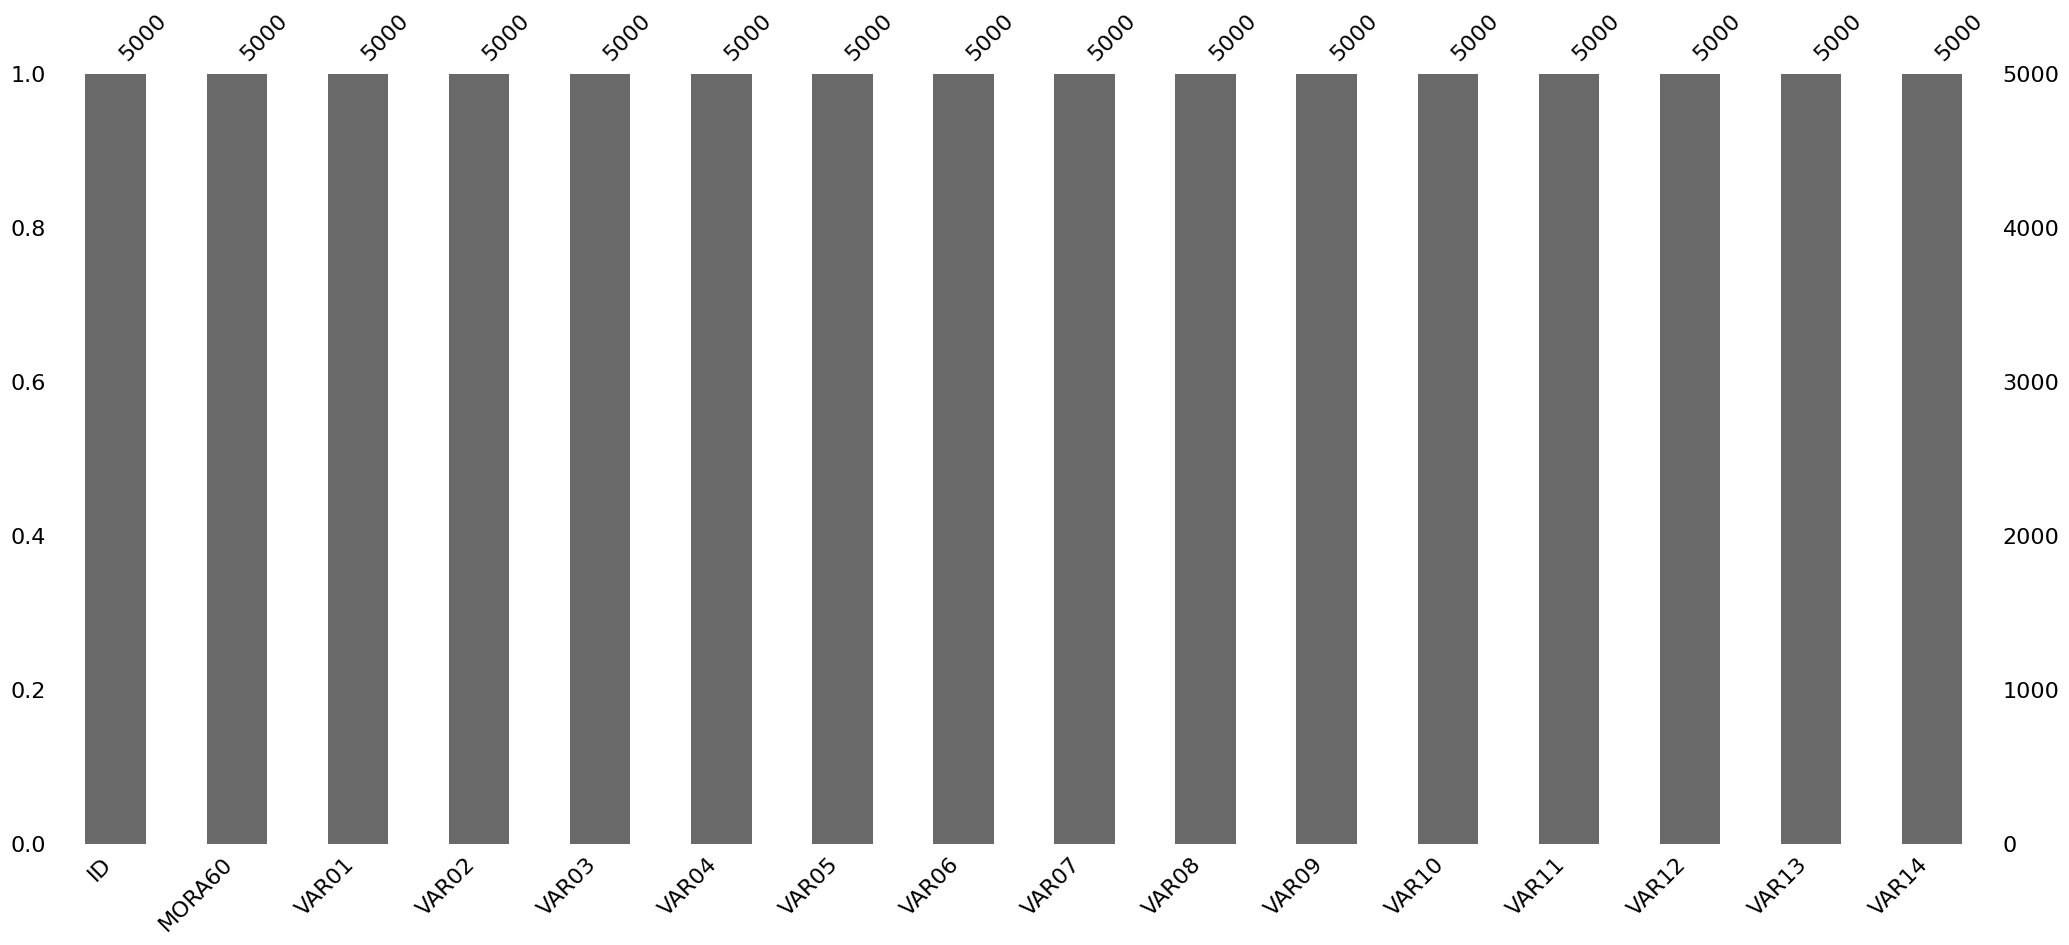

In [ ]:
# Usar la función bar para visualizar los valores faltantes
msno.bar(df=df)

In [ ]:
#Calculamos el procentaje:
(df.isnull().sum() / len(df)) * 100

,0
ID,0.0
MORA60,0.0
VAR01,0.0
VAR02,0.0
VAR03,0.0
VAR04,0.0
VAR05,0.0
VAR06,0.0
VAR07,0.0
VAR08,0.0


After looking at the above output, we can say that there are 11 missing values for Total Charges. Let us replace remove these 11 rows from our data set

In [ ]:
df2 = df.copy()
#Eliminando los ID de clientes del conjunto de datos
df2 = df.iloc[:,1:]
df2.head()

,MORA60,VAR01,VAR02,VAR03,VAR04,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14
0,0,235,FAMILIAR,30,2007-06-01,93,5,3500.0,0.00,0.00,214,5,Lima,4,PROFESIONAL
1,0,18,FAMILIAR,32,2005-02-01,9,12,900.0,1824.67,1933.75,175,12,La Libertad,1,TECNICO
2,0,0,FAMILIAR,26,2003-08-01,8,2,2400.0,2797.38,188.29,187,0,Lima,0,PROFESIONAL
3,0,0,FAMILIAR,36,2003-07-01,20,12,2700.0,0.00,0.00,187,12,Ancash,0,TECNICO
4,0,0,FAMILIAR,46,2006-11-01,0,1,3100.0,2000.00,11010.65,189,0,Lima,0,TECNICO


In [ ]:
#Calculamos el procentaje:
(df2.isnull().sum() / len(df)) * 100

,0
MORA60,0.0
VAR01,0.0
VAR02,0.0
VAR03,0.0
VAR04,0.0
VAR05,0.0
VAR06,0.0
VAR07,0.0
VAR08,0.0
VAR09,0.0


**PASO3:**

Análisis de valores duplicados

In [ ]:
# Verificar la existencia de registros duplicados
df2.duplicated().sum()/len(df2)

np.float64(0.0114)

In [ ]:
# Verificar la existencia de registros duplicados
(df2.duplicated().sum()/len(df2))* 100

np.float64(1.1400000000000001)

In [ ]:
#Eliminar duplicados
df2.drop_duplicates(inplace=True)

In [ ]:
## Total de columnas
df2.shape

(4943, 15)

In [ ]:
df2.head(3)

,MORA60,VAR01,VAR02,VAR03,VAR04,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14
0,0,235,FAMILIAR,30,2007-06-01,93,5,3500.0,0.00,0.00,214,5,Lima,4,PROFESIONAL
1,0,18,FAMILIAR,32,2005-02-01,9,12,900.0,1824.67,1933.75,175,12,La Libertad,1,TECNICO
2,0,0,FAMILIAR,26,2003-08-01,8,2,2400.0,2797.38,188.29,187,0,Lima,0,PROFESIONAL


**PASO4:**


Exploración de variables categóricas



In [ ]:
df2.columns

Index(['MORA60', 'VAR01', 'VAR02', 'VAR03', 'VAR04', 'VAR05', 'VAR06', 'VAR07',
       'VAR08', 'VAR09', 'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR14'],
      dtype='object')

In [ ]:
columnsString= ['MORA60','VAR01','VAR02', 'VAR03', 'VAR04', 'VAR05', 'VAR06', 'VAR07',
       'VAR08', 'VAR09', 'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR14']

In [ ]:
for x in columnsString:
    print(x)
    frecuencias = df2[x].value_counts(dropna=False)
    porcentajes = (frecuencias / len(df2)) * 100
    print(pd.DataFrame({'Frecuencia': frecuencias, 'Porcentaje (%)': porcentajes}))
    print("\n")

MORA60
        Frecuencia  Porcentaje (%)
MORA60                            
1             3446       69.714748
0             1497       30.285252


VAR01
       Frecuencia  Porcentaje (%)
VAR01                            
0            3085       62.411491
2             513       10.378313
1             391        7.910176
25             86        1.739834
8              77        1.557758
...           ...             ...
84              1        0.020231
59              1        0.020231
46              1        0.020231
69              1        0.020231
58              1        0.020231

[63 rows x 2 columns]


VAR02
           Frecuencia  Porcentaje (%)
VAR02                                
FAMILIAR         3433       69.451750
PROPIA           1411       28.545418
ALQUILADA          55        1.112685
OTRAS              44        0.890148


VAR03
       Frecuencia  Porcentaje (%)
VAR03                            
29            254        5.138580
32            244        4.936274


In [ ]:
columnsString2= ['MORA60','VAR02', 'VAR06', 'VAR11', 'VAR13', 'VAR14']

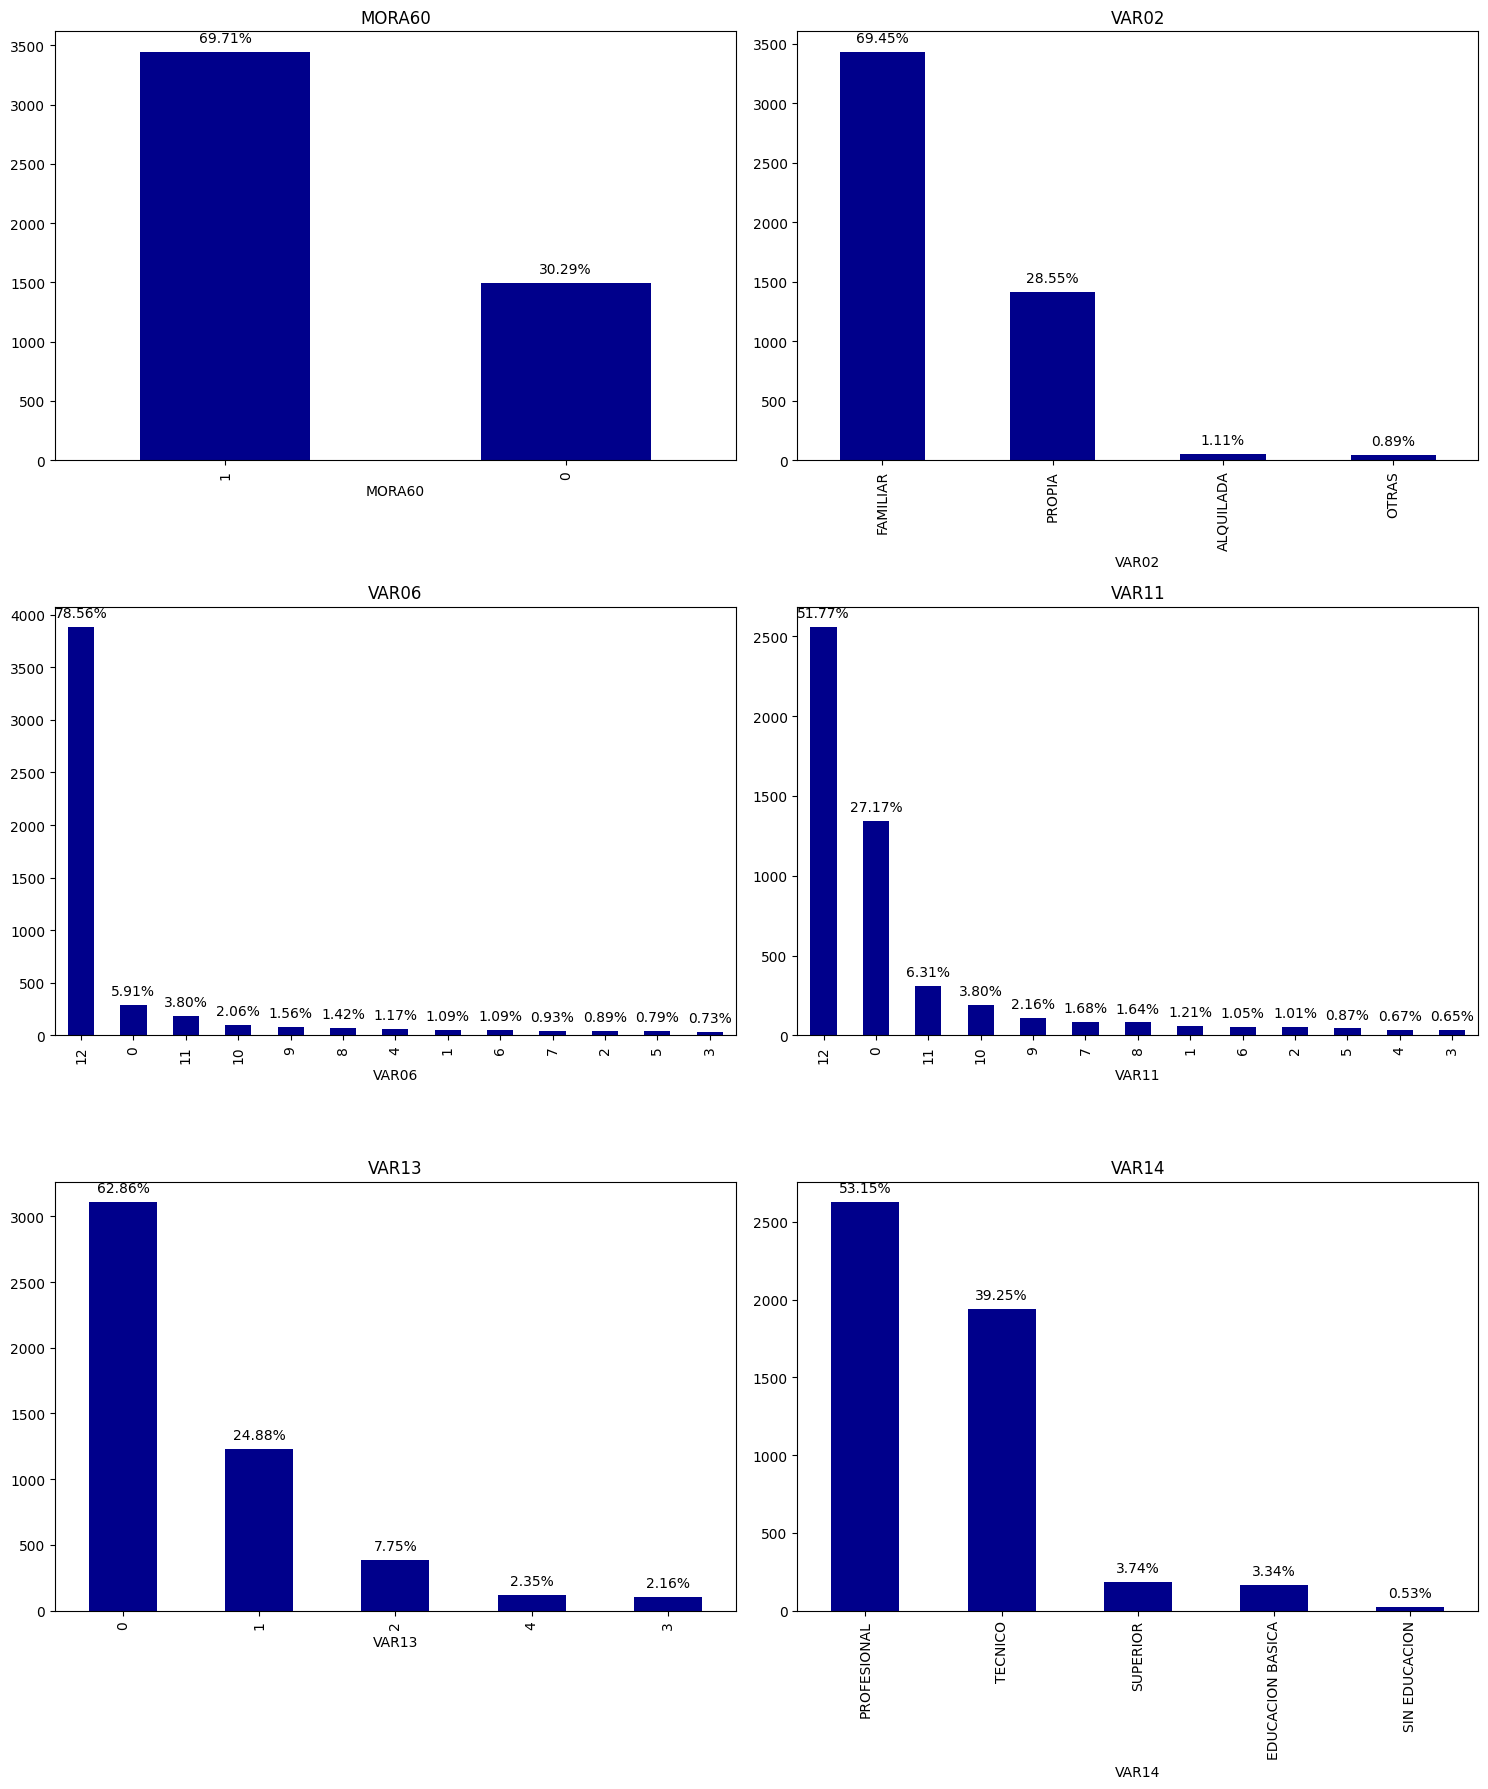

In [ ]:
import matplotlib.pyplot as plt
import math

# Definir cuántas columnas por fila tendrá la cuadrícula de gráficos
columns_per_row = 2
num_columns = len(columnsString2)
num_rows = math.ceil(num_columns / columns_per_row)

# Crear la figura con subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=columns_per_row, figsize=(15, 6 * num_rows))
# Aplanar los ejes en caso de que haya más de una fila
axes = axes.flatten()

# Definir el color azul oscuro
color = 'darkblue'

# Iterar sobre las columnas y los ejes para graficar
for i, (ax, x) in enumerate(zip(axes, columnsString2)):
    # Contar valores y calcular los porcentajes
    counts = df2.fillna("--NULL")[x].value_counts()
    total = len(df2)
    # Crear el gráfico de barras con color azul oscuro
    counts.plot(kind='bar', ax=ax, title=x, color=color)
    # Añadir porcentaje sobre cada barra
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.2f}%'
        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

# Si hay más ejes que columnas, ocultar los ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
# Ajustar el layout para que los gráficos no se solapen
plt.tight_layout()
# Mostrar los gráficos
plt.show()


In [ ]:
(df2.isnull().sum() / df2.shape[0]) * 100

,0
MORA60,0.0
VAR01,0.0
VAR02,0.0
VAR03,0.0
VAR04,0.0
VAR05,0.0
VAR06,0.0
VAR07,0.0
VAR08,0.0
VAR09,0.0


# EDA



In [ ]:
# Exclude 'VAR04' column before calculating descriptive statistics
df2.drop(columns=['VAR04'], errors='ignore').describe().round(2)

,MORA60,VAR01,VAR03,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR13
count,4943.00,4943.00,4943.00,4943.00,4943.00,4943.00,4943.00,4943.00,4943.00,4943.00,4943.00
mean,0.70,4.43,36.39,25.31,10.57,4344.46,10235.52,5685.48,196.67,7.92,0.56
std,0.46,13.58,9.78,31.94,3.39,5383.04,19904.48,10771.43,19.43,5.27,0.90
min,0.00,0.00,20.00,0.00,0.00,123.70,0.00,0.00,134.00,0.00,0.00
25%,0.00,0.00,29.00,0.00,12.00,1386.41,397.50,310.51,182.00,0.00,0.00
50%,1.00,0.00,34.00,12.00,12.00,2400.00,2900.00,2086.79,197.00,12.00,0.00
75%,1.00,2.00,42.00,39.00,12.00,4856.50,9736.56,5346.00,212.00,12.00,1.00
max,1.00,245.00,85.00,130.00,12.00,30000.00,121543.40,57094.38,266.00,12.00,4.00


* El 70% de los clientes presenta mora > 60 días.
* En promedio los clientes tuvieron 4 días de atraso máximo en el año previo, aunque algunos alcanzaron hasta 245 días.
* La edad promedio de los clientes es 36 años, con un rango entre 20 y 85 años.
* La fecha de ingreso laboral más antigua es de 1961 y la más reciente de 2009 (se debe transformar en antigüedad laboral en años).
* La antigüedad con tarjeta de crédito en el sistema financiero es en promedio 25 meses, con un máximo de 130 meses.
* En promedio, los clientes tuvieron un producto de ahorro activo durante 11 meses en el último año.
* El ingreso mensual promedio de los clientes es de 4,344, aunque algunos superan los 30,000 (outliers).
* La línea de crédito promedio es de 10,236, con casos extremos de hasta 121,543.
* El saldo deudor promedio es de 5,685, con clientes que alcanzan deudas de hasta 57,094.
* El score de aprobación promedio es 197, con un rango entre 134 y 266.
* En promedio, los clientes recibieron 8 abonos de haberes en el banco durante los últimos 12 meses, aunque muchos registraron 12 abonos completos.
* El 56% de los clientes alcanzó alguna clasificación de riesgo distinta a Normal en la SBS, con casos que llegaron hasta Pérdida (nivel 4).
* Existen valores atípicos principalmente en ingresos, línea de crédito y saldo deudor.


In [ ]:
df2.head(4)

,MORA60,VAR01,VAR02,VAR03,VAR04,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14
0,0,235,FAMILIAR,30,2007-06-01,93,5,3500.0,0.00,0.00,214,5,Lima,4,PROFESIONAL
1,0,18,FAMILIAR,32,2005-02-01,9,12,900.0,1824.67,1933.75,175,12,La Libertad,1,TECNICO
2,0,0,FAMILIAR,26,2003-08-01,8,2,2400.0,2797.38,188.29,187,0,Lima,0,PROFESIONAL
3,0,0,FAMILIAR,36,2003-07-01,20,12,2700.0,0.00,0.00,187,12,Ancash,0,TECNICO


In [ ]:
df2.describe(include='all').round(2)

,MORA60,VAR01,VAR02,VAR03,VAR04,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14
count,4943.00,4943.00,4943,4943.00,4943,4943.00,4943.00,4943.00,4943.00,4943.00,4943.00,4943.00,4943,4943.00,4943
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN,5
top,NaN,NaN,FAMILIAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lima,NaN,PROFESIONAL
freq,NaN,NaN,3433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2911,NaN,2627
mean,0.70,4.43,NaN,36.39,2002-05-26 07:08:14.517499520,25.31,10.57,4344.46,10235.52,5685.48,196.67,7.92,NaN,0.56,NaN
min,0.00,0.00,NaN,20.00,1961-01-01 00:00:00,0.00,0.00,123.70,0.00,0.00,134.00,0.00,NaN,0.00,NaN
25%,0.00,0.00,NaN,29.00,2000-08-01 00:00:00,0.00,12.00,1386.41,397.50,310.51,182.00,0.00,NaN,0.00,NaN
50%,1.00,0.00,NaN,34.00,2004-04-01 00:00:00,12.00,12.00,2400.00,2900.00,2086.79,197.00,12.00,NaN,0.00,NaN
75%,1.00,2.00,NaN,42.00,2006-03-31 12:00:00,39.00,12.00,4856.50,9736.56,5346.00,212.00,12.00,NaN,1.00,NaN
max,1.00,245.00,NaN,85.00,2009-08-01 00:00:00,130.00,12.00,30000.00,121543.40,57094.38,266.00,12.00,NaN,4.00,NaN


In [ ]:
# Select only the categorical variables VAR02, VAR12, and VAR14
categorical_df = df2[['VAR02', 'VAR12', 'VAR14']]

# Get descriptive statistics including categorical data
description = categorical_df.describe(include='all')

# Select only the rows up to 'freq'
description_filtered = description.loc[['count', 'unique', 'top', 'freq']]

# Display the filtered description
display(description_filtered)

,VAR02,VAR12,VAR14
count,4943,4943,4943
unique,4,25,5
top,FAMILIAR,Lima,PROFESIONAL
freq,3433,2911,2627


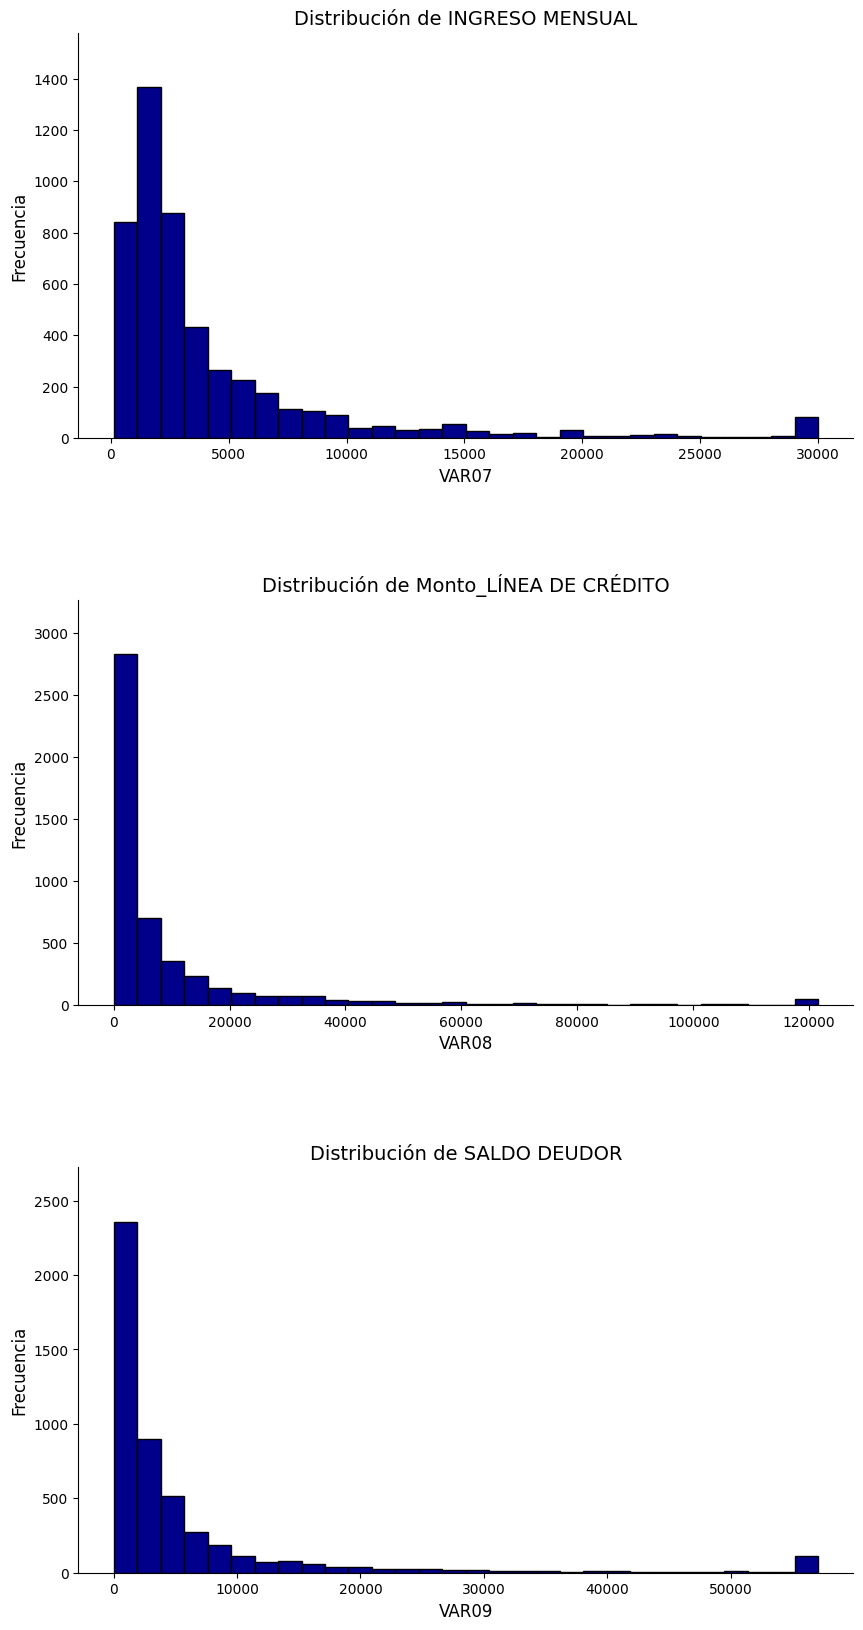

In [ ]:
import matplotlib.pyplot as plt

# Definir las variables a graficar
variables = ['VAR07', 'VAR08', 'VAR09']
titulos = ['Distribución de INGRESO MENSUAL',
           'Distribución de Monto_LÍNEA DE CRÉDITO',
           'Distribución de SALDO DEUDOR']

# Crear la figura y los ejes (3 filas, 1 columna)
fig, axes = plt.subplots(3, 1, figsize=(10, 20))

# Generar cada histograma
for i, var in enumerate(variables):
    axes[i].hist(df2[var], bins=30, color='darkblue', edgecolor='black')
    axes[i].set_title(titulos[i], fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Frecuencia', fontsize=12)
    # Eliminar bordes superior y derecho
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    # Adjust y-axis limit to show the full range
    axes[i].set_ylim(0, axes[i].get_ylim()[1] * 1.1) # Add a 10% buffer to the upper limit


# Ajustar espaciado
fig.subplots_adjust(hspace=0.4) # Adjust hspace for more vertical space
plt.show()

In [ ]:
import pandas as pd
import numpy as np

variables = ['VAR07', 'VAR08', 'VAR09']
num_bins = 30  # Using the same number of bins as in the histograms

for var in variables:
    print(f"Frequency Table for {var}")
    # Calculate histogram data
    counts, bin_edges = np.histogram(df2[var], bins=num_bins)

    # Create a DataFrame for the frequency table
    # Format bin edges for better readability
    bin_labels = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]
    frequency_table = pd.DataFrame({'Range': bin_labels, 'Frequency': counts})

    # Display the frequency table
    display(frequency_table)
    print("\n")

Frequency Table for VAR07


,Range,Frequency
0,123.70 - 1119.58,842
1,1119.58 - 2115.45,1367
2,2115.45 - 3111.33,878
3,3111.33 - 4107.21,434
4,4107.21 - 5103.08,265
5,5103.08 - 6098.96,224
6,6098.96 - 7094.84,177
7,7094.84 - 8090.71,112
8,8090.71 - 9086.59,104
9,9086.59 - 10082.47,90




Frequency Table for VAR08


,Range,Frequency
0,0.00 - 4051.45,2825
1,4051.45 - 8102.89,702
2,8102.89 - 12154.34,359
3,12154.34 - 16205.79,240
4,16205.79 - 20257.23,136
5,20257.23 - 24308.68,96
6,24308.68 - 28360.13,76
7,28360.13 - 32411.57,78
8,32411.57 - 36463.02,77
9,36463.02 - 40514.47,42




Frequency Table for VAR09


,Range,Frequency
0,0.00 - 1903.15,2357
1,1903.15 - 3806.29,896
2,3806.29 - 5709.44,518
3,5709.44 - 7612.58,274
4,7612.58 - 9515.73,186
5,9515.73 - 11418.88,111
6,11418.88 - 13322.02,71
7,13322.02 - 15225.17,78
8,15225.17 - 17128.31,56
9,17128.31 - 19031.46,37


In [ ]:
df2[['VAR07', 'VAR08', 'VAR09']].mode()

,VAR07,VAR08,VAR09
0,2100.0,0.0,0.0


In [ ]:
df2[['VAR07', 'VAR08', 'VAR09']].describe()

,VAR07,VAR08,VAR09
count,4943.000000,4943.000000,4943.000000
mean,4344.464232,10235.517821,5685.482486
std,5383.044530,19904.483083,10771.434764
min,123.700000,0.000000,0.000000
25%,1386.410000,397.505000,310.510000
50%,2400.000000,2900.000000,2086.790000
75%,4856.500000,9736.560000,5346.000000
max,30000.000000,121543.400000,57094.380000


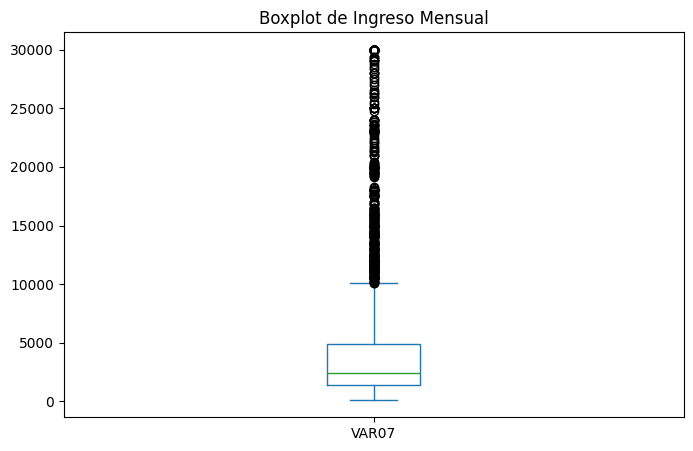

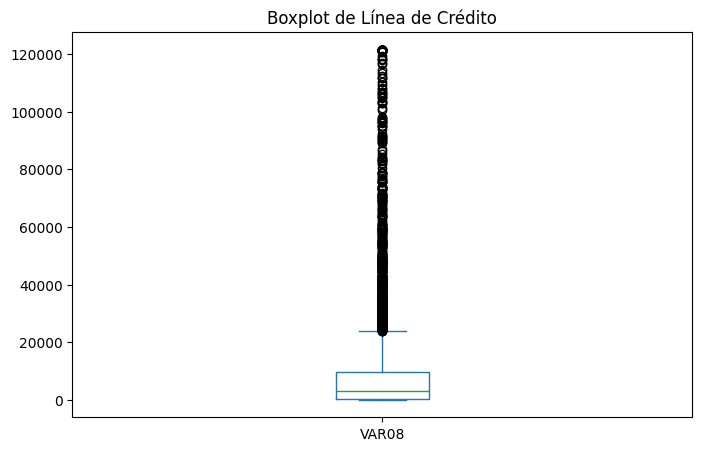

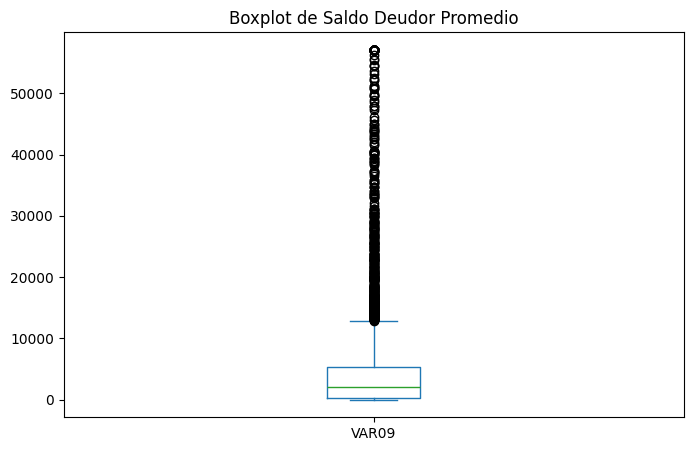

In [ ]:
df2['VAR07'].plot(kind='box', vert=True, figsize=(8, 5), title='Boxplot de Ingreso Mensual')
plt.show()

df2['VAR08'].plot(kind='box', vert=True, figsize=(8, 5), title='Boxplot de Línea de Crédito')
plt.show()

df2['VAR09'].plot(kind='box', vert=True, figsize=(8, 5), title='Boxplot de Saldo Deudor Promedio')
plt.show()

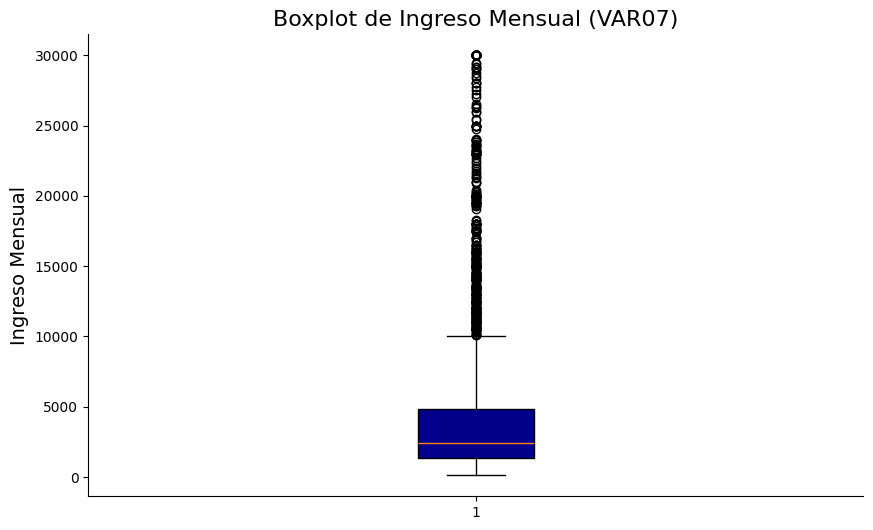

In [ ]:
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el boxplot vertical
plt.boxplot(df2['VAR07'], vert=True, patch_artist=True, boxprops=dict(facecolor='darkblue'))

# Añadir título y etiquetas a los ejes
plt.title('Boxplot de Ingreso Mensual (VAR07)', fontsize=16)
plt.ylabel('Ingreso Mensual', fontsize=14)

# Eliminar las líneas superiores y derechas del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrar el gráfico
plt.show()


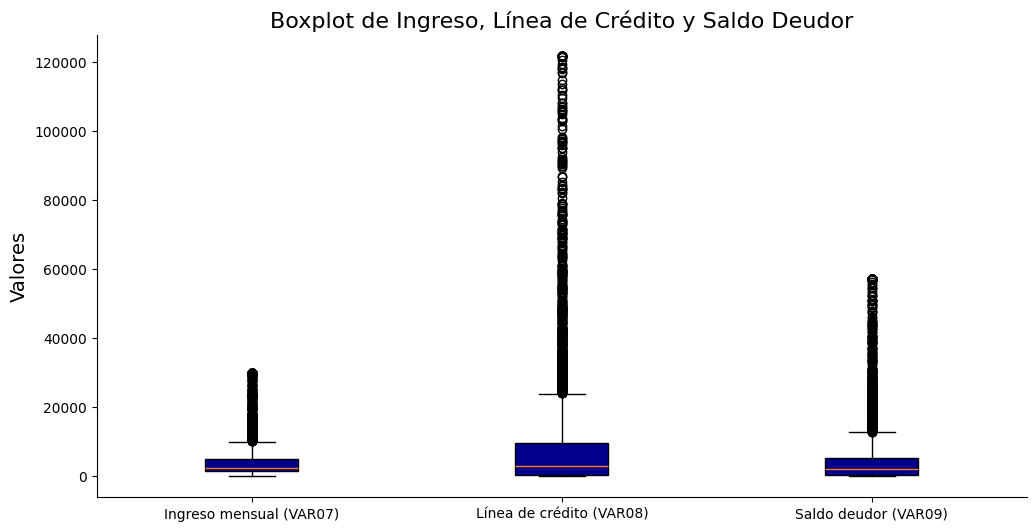

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear el boxplot para varias columnas
plt.boxplot([df2['VAR07'], df2['VAR08'], df2['VAR09']],
            vert=True, patch_artist=True,
            boxprops=dict(facecolor='darkblue'))

# Añadir título y etiquetas
plt.title('Boxplot de Ingreso, Línea de Crédito y Saldo Deudor', fontsize=16)
plt.ylabel('Valores', fontsize=14)
plt.xticks([1, 2, 3], ['Ingreso mensual (VAR07)', 'Línea de crédito (VAR08)', 'Saldo deudor (VAR09)'])

# Eliminar las líneas superiores y derechas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrar el gráfico
plt.show()

In [ ]:
df2.head(3)

,MORA60,VAR01,VAR02,VAR03,VAR04,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14
0,0,235,FAMILIAR,30,2007-06-01,93,5,3500.0,0.00,0.00,214,5,Lima,4,PROFESIONAL
1,0,18,FAMILIAR,32,2005-02-01,9,12,900.0,1824.67,1933.75,175,12,La Libertad,1,TECNICO
2,0,0,FAMILIAR,26,2003-08-01,8,2,2400.0,2797.38,188.29,187,0,Lima,0,PROFESIONAL


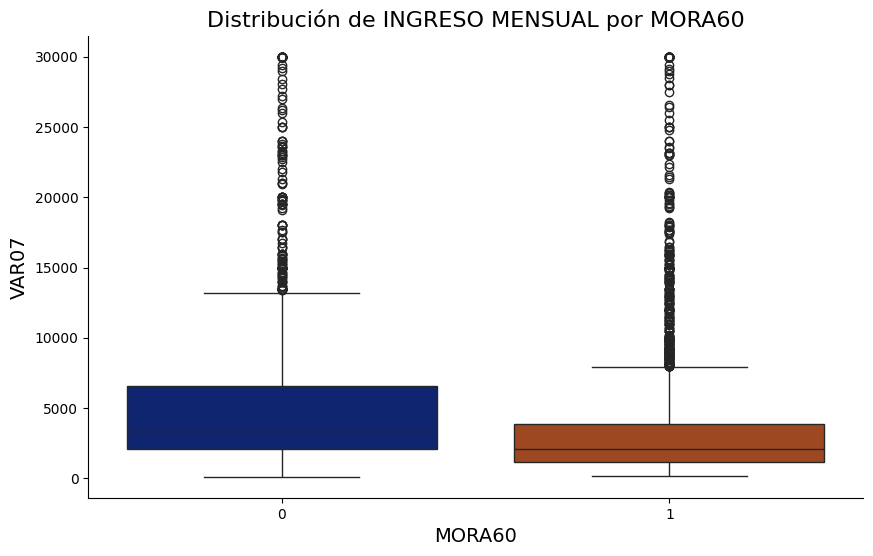

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el boxplot con Seaborn
sns.boxplot(x=df2.MORA60, y=df2.VAR07, palette="dark", linewidth=1)

# Añadir título y etiquetas a los ejes
plt.title('Distribución de INGRESO MENSUAL por MORA60', fontsize=16)
plt.xlabel('MORA60', fontsize=14)
plt.ylabel('VAR07', fontsize=14)

# Mejorar el estilo del gráfico
sns.despine(top=True, right=True)

# Mostrar el gráfico
plt.show()

Clientes que perciben MENOR INGRESO MENSUAL --> han incurrido en MORA>60DÍAS

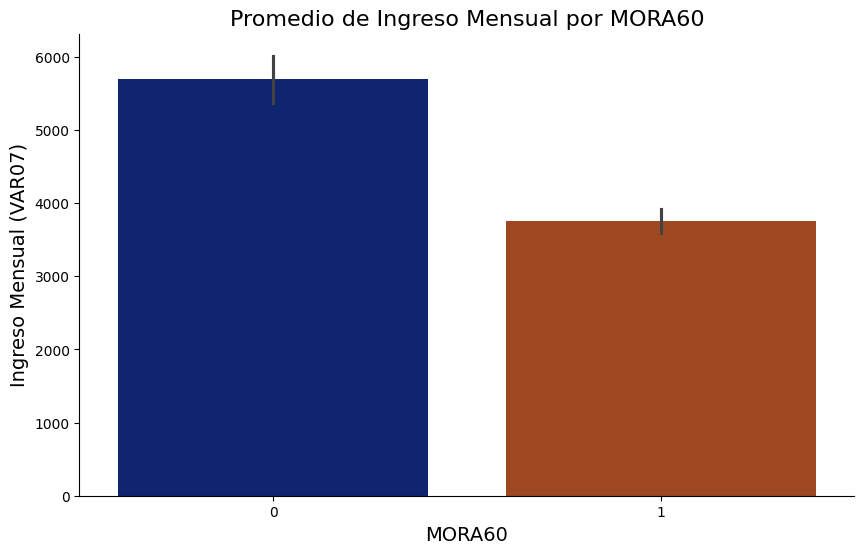

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear gráfico de barras (promedio por grupo)
sns.barplot(x="MORA60", y="VAR07", data=df2, palette="dark")

# Añadir título y etiquetas a los ejes
plt.title('Promedio de Ingreso Mensual por MORA60', fontsize=16)
plt.xlabel('MORA60', fontsize=14)
plt.ylabel('Ingreso Mensual (VAR07)', fontsize=14)

# Mejorar estilo
sns.despine(top=True, right=True)

# Mostrar gráfico
plt.show()

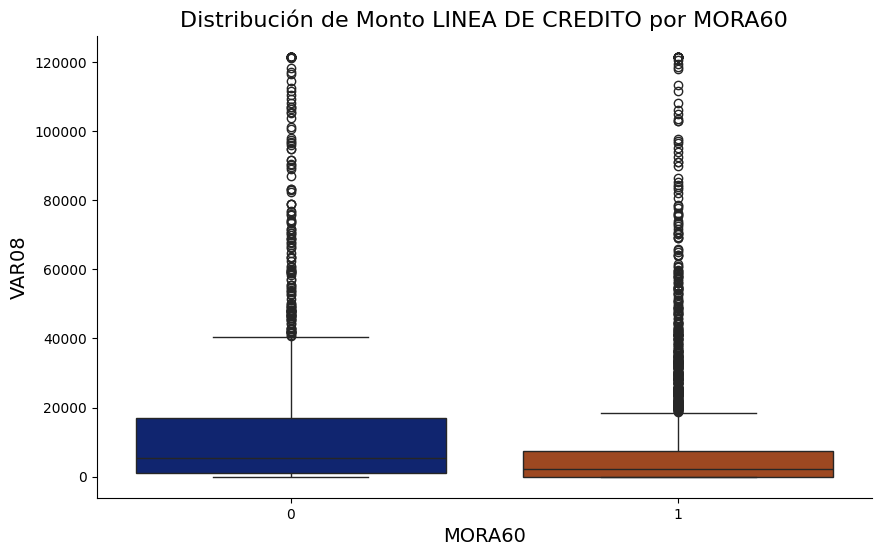

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el boxplot con Seaborn
sns.boxplot(x=df2.MORA60, y=df2.VAR08, palette="dark", linewidth=1)

# Añadir título y etiquetas a los ejes
plt.title('Distribución de Monto LINEA DE CREDITO por MORA60', fontsize=16)
plt.xlabel('MORA60', fontsize=14)
plt.ylabel('VAR08', fontsize=14)

# Mejorar el estilo del gráfico
sns.despine(top=True, right=True)

# Mostrar el gráfico
plt.show()

Clientes con MENOR Monto LÍNEA DE CRÉDITO --> han incurrido en MORA>60DÍAS

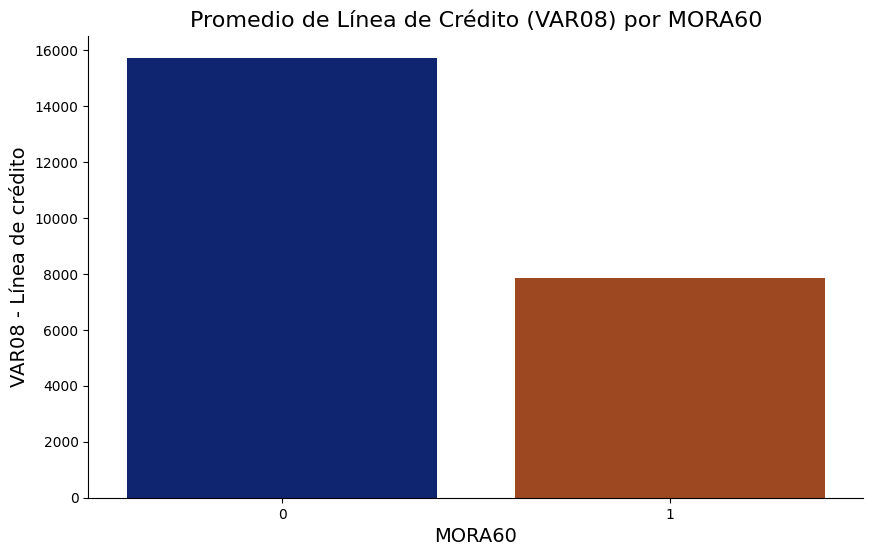

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear gráfico de barras (promedio por grupo)
sns.barplot(x=df2.MORA60, y=df2.VAR08, palette="dark", ci=None)

# Añadir título y etiquetas a los ejes
plt.title('Promedio de Línea de Crédito (VAR08) por MORA60', fontsize=16)
plt.xlabel('MORA60', fontsize=14)
plt.ylabel('VAR08 - Línea de crédito', fontsize=14)

# Mejorar el estilo del gráfico
sns.despine(top=True, right=True)

# Mostrar el gráfico
plt.show()

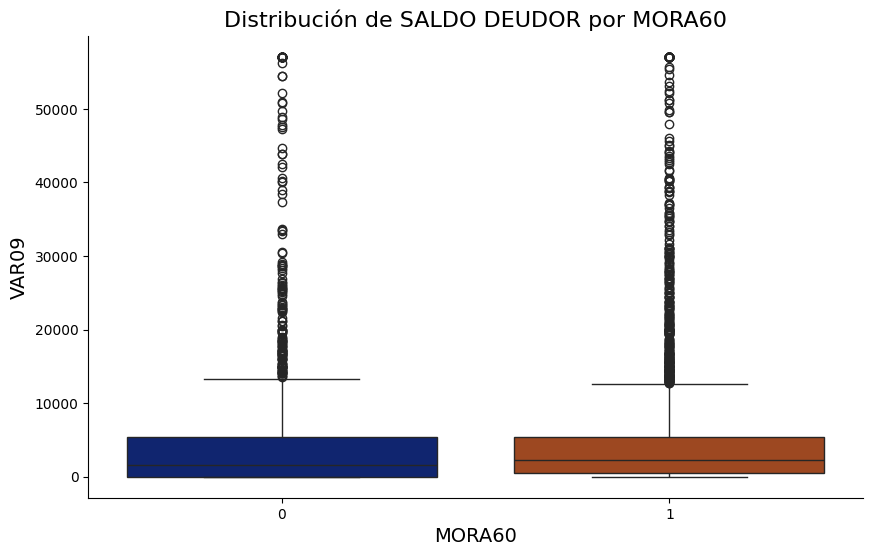

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el boxplot con Seaborn
sns.boxplot(x=df2.MORA60, y=df2.VAR09, palette="dark", linewidth=1)

# Añadir título y etiquetas a los ejes
plt.title('Distribución de SALDO DEUDOR por MORA60', fontsize=16)
plt.xlabel('MORA60', fontsize=14)
plt.ylabel('VAR09', fontsize=14)

# Mejorar el estilo del gráfico
sns.despine(top=True, right=True)

# Mostrar el gráfico
plt.show()

Clientes con MAYOR SALDO DEUDOR --> Han incurrido en MORA>60DÍAS

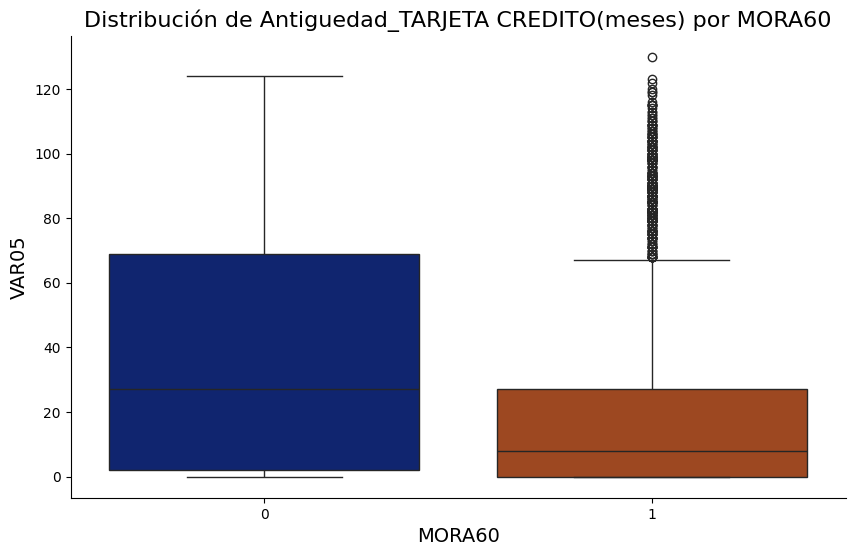

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el boxplot con Seaborn
sns.boxplot(x=df2.MORA60, y=df2.VAR05, palette="dark", linewidth=1)

# Añadir título y etiquetas a los ejes
plt.title('Distribución de Antiguedad_TARJETA CREDITO(meses) por MORA60', fontsize=16)
plt.xlabel('MORA60', fontsize=14)
plt.ylabel('VAR05', fontsize=14)

# Mejorar el estilo del gráfico
sns.despine(top=True, right=True)

# Mostrar el gráfico
plt.show()

Los Clientes con menor antiguedad en su TARJETA DE CREDITO --> Han incurrido en MORA>60DÍAS

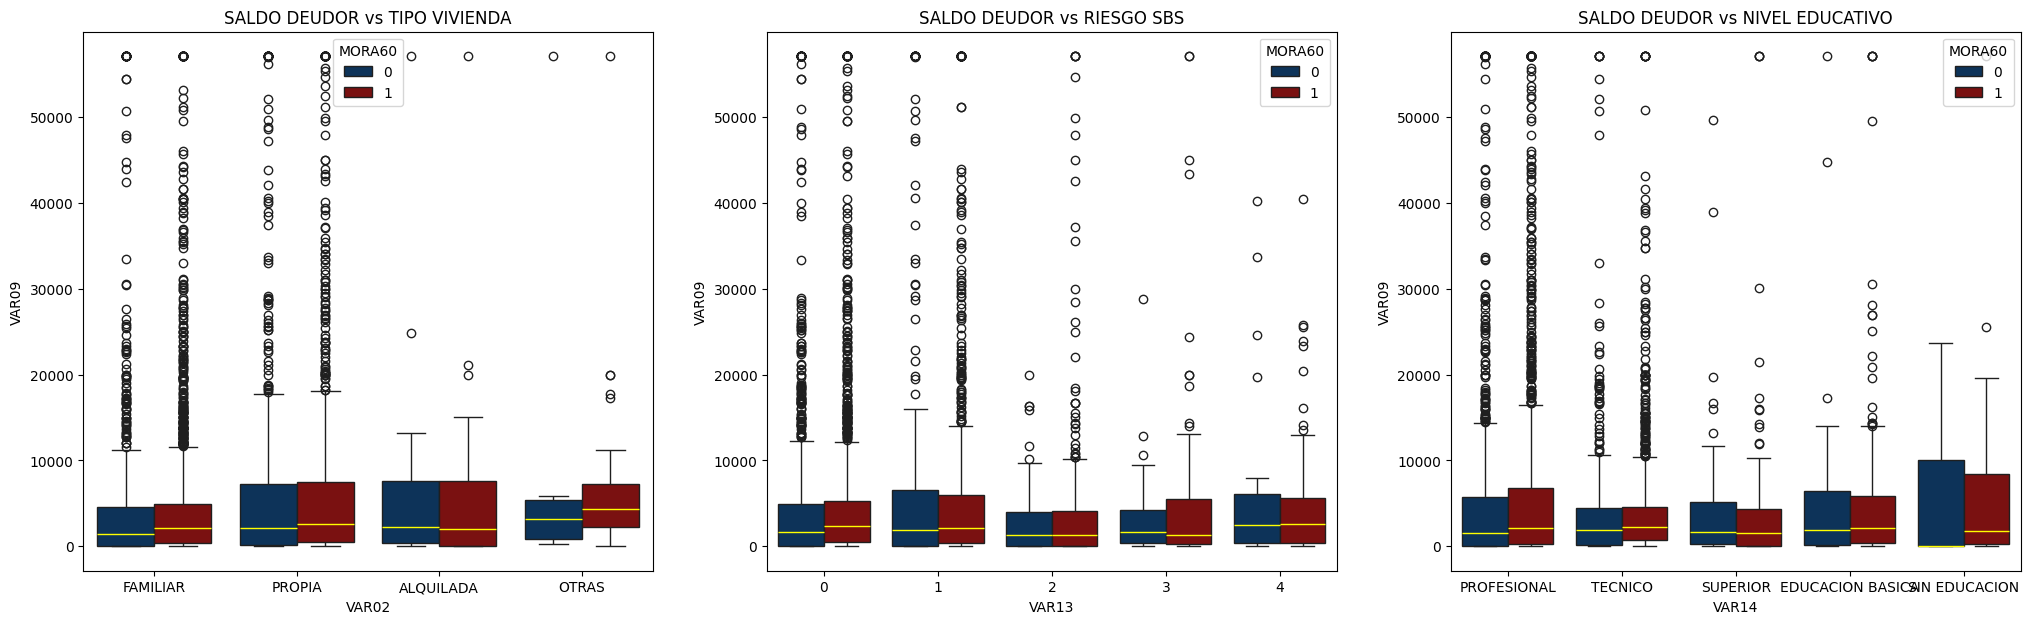

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'l3' es una lista de variables categóricas a comparar
l3 = ['VAR02', 'VAR13', 'VAR14']  # Ejemplo de variables categóricas
j3 = ['TIPO VIVIENDA','RIESGO SBS','NIVEL EDUCATIVO']
colors = ['#003366', '#8B0000']  # Azul oscuro y rojo oscuro

# Crear la figura con subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

for i in range(len(l3)):
    plt.subplot(1, 3, i + 1)
    ax = sns.boxplot(x=l3[i], y='VAR09', data=df2, hue='MORA60', palette=colors, medianprops={'color': 'yellow'})
    title = 'SALDO DEUDOR vs ' + j3[i]
    plt.title(title)

plt.show()


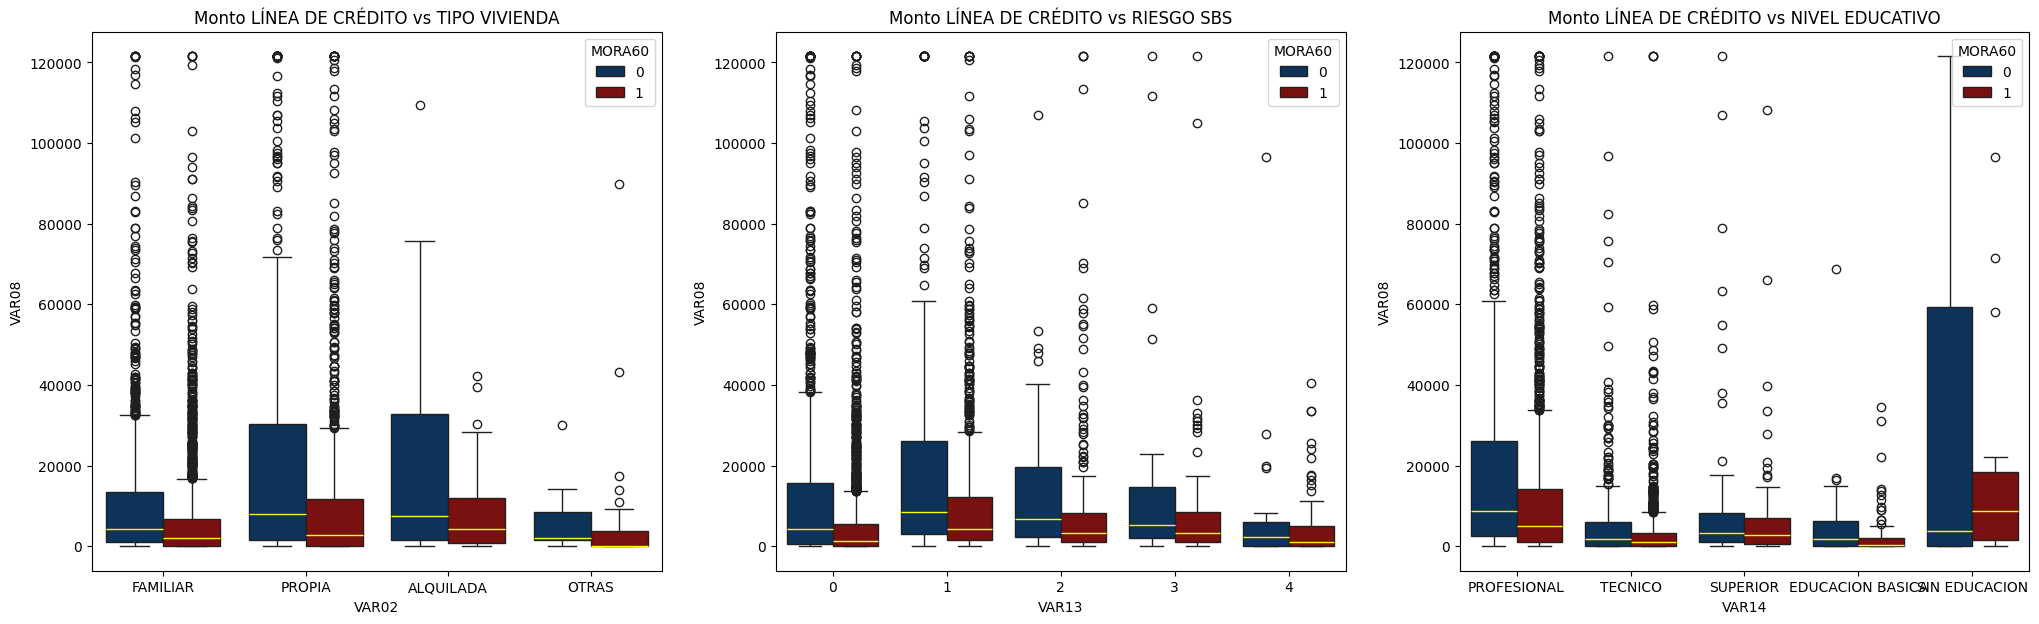

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'l3' es una lista de variables categóricas a comparar
l3 = ['VAR02', 'VAR13', 'VAR14']  # Ejemplo de variables categóricas
j3 = ['TIPO VIVIENDA','RIESGO SBS','NIVEL EDUCATIVO']
colors = ['#003366', '#8B0000']  # Azul oscuro y rojo oscuro

# Crear la figura con subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

for i in range(len(l3)):
    plt.subplot(1, 3, i + 1)
    ax = sns.boxplot(x=l3[i], y='VAR08', data=df2, hue='MORA60', palette=colors, medianprops={'color': 'yellow'})
    title = 'Monto LÍNEA DE CRÉDITO vs ' + j3[i]
    plt.title(title)

plt.show()

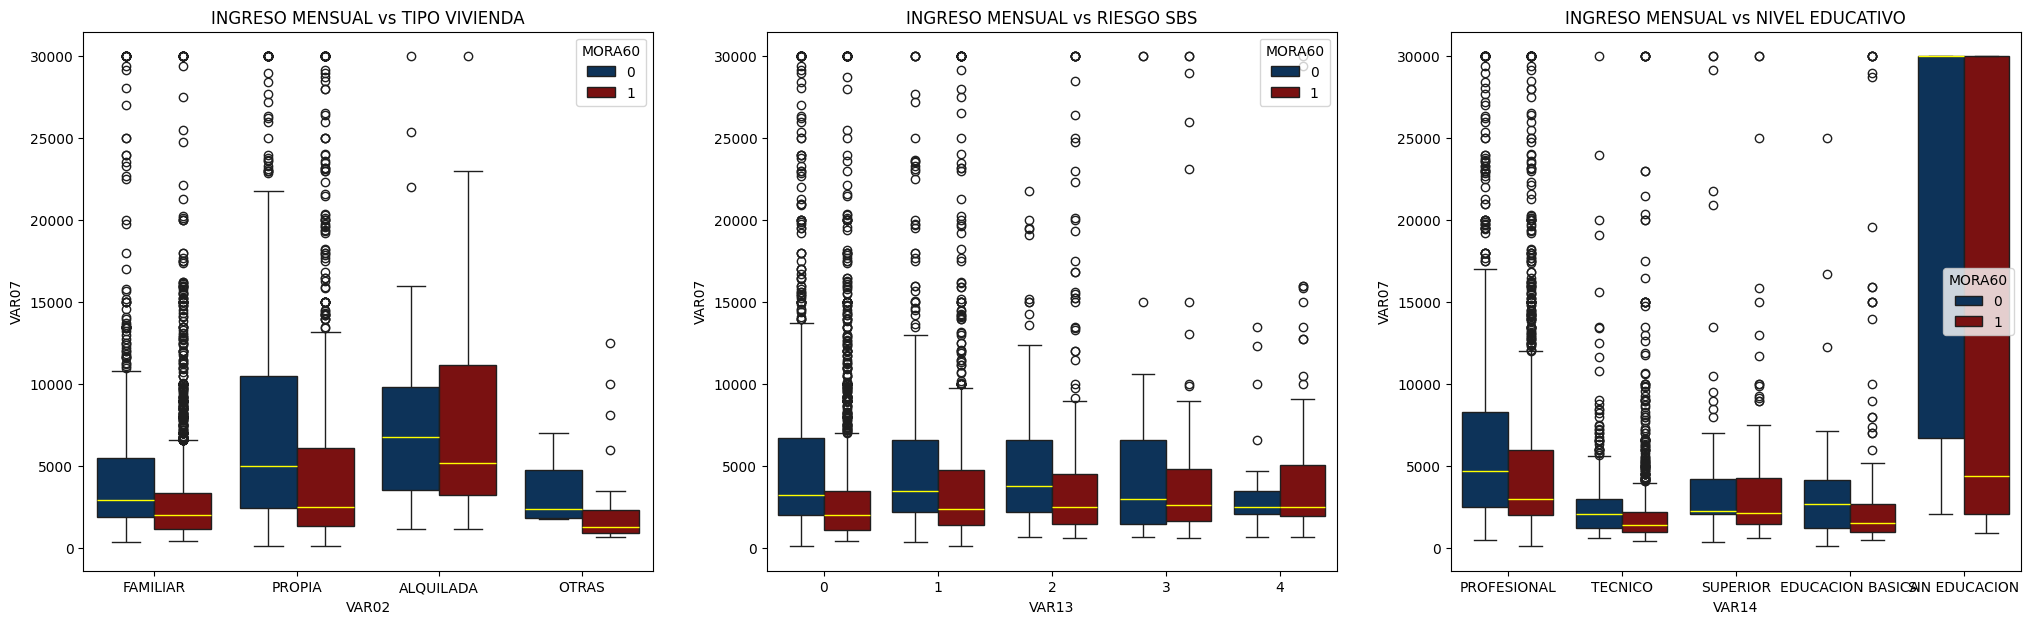

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'l3' es una lista de variables categóricas a comparar
l3 = ['VAR02', 'VAR13', 'VAR14']  # Ejemplo de variables categóricas
j3 = ['TIPO VIVIENDA','RIESGO SBS','NIVEL EDUCATIVO']
colors = ['#003366', '#8B0000']  # Azul oscuro y rojo oscuro

# Crear la figura con subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

for i in range(len(l3)):
    plt.subplot(1, 3, i + 1)
    ax = sns.boxplot(x=l3[i], y='VAR07', data=df2, hue='MORA60', palette=colors, medianprops={'color': 'yellow'})
    title = 'INGRESO MENSUAL vs ' + j3[i]
    plt.title(title)

plt.show()

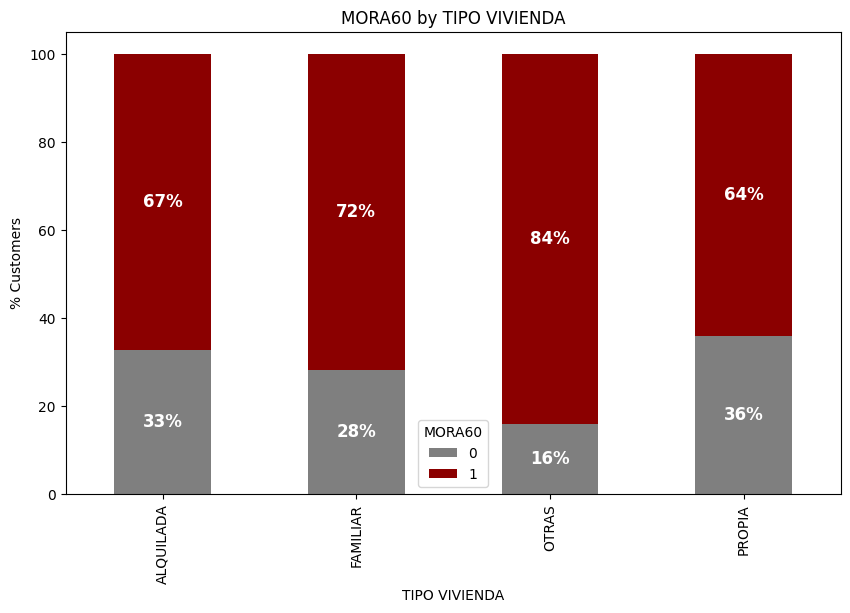

In [ ]:
# Agrupar por 'Contract' y 'Churn' y calcular las proporciones
contract_churn = df2.groupby(['VAR02', 'MORA60']).size().unstack()
# Calcular los porcentajes
contract_churn_perc = contract_churn.div(contract_churn.sum(1), axis=0) * 100
# Crear el gráfico de barras apiladas con porcentajes
ax = contract_churn_perc.plot(kind='bar', stacked=True,  color=['#7f7f7f','#8B0000'], figsize=(10, 6))
# Añadir título y etiquetas
plt.title('MORA60 by TIPO VIVIENDA')
plt.ylabel('% Customers')
plt.xlabel('TIPO VIVIENDA')
plt.legend(title='MORA60')
# Añadir etiquetas de porcentaje en las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}%', (x + width / 2, y + height / 2),
                ha='center', va='center', color='white', fontsize=12, weight='bold')

# Mostrar el gráfico
plt.show()


- Más del 64% de los clientes, independientemente del Tipo de Vivienda, presenta MORA >60 DÍAS.
- El 84% de clientes en tipo de Vivienda OTRAS han presentado MORA60 vs el 64% de clientes con vivienda PROPIA.

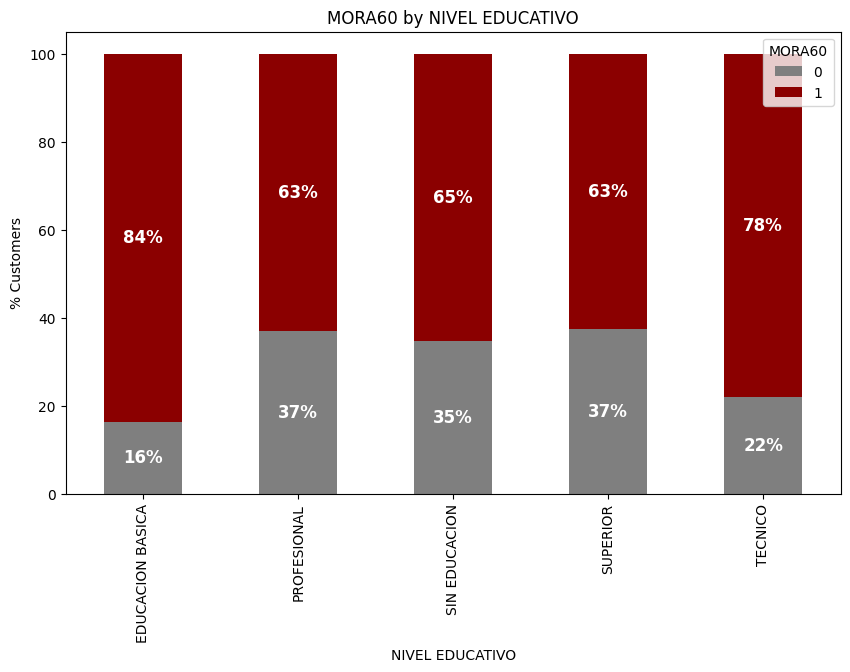

In [ ]:
# Agrupar por 'Contract' y 'Churn' y calcular las proporciones
contract_churn = df2.groupby(['VAR14', 'MORA60']).size().unstack()
# Calcular los porcentajes
contract_churn_perc = contract_churn.div(contract_churn.sum(1), axis=0) * 100
# Crear el gráfico de barras apiladas con porcentajes
ax = contract_churn_perc.plot(kind='bar', stacked=True,  color=['#7f7f7f','#8B0000'], figsize=(10, 6))
# Añadir título y etiquetas
plt.title('MORA60 by NIVEL EDUCATIVO')
plt.ylabel('% Customers')
plt.xlabel('NIVEL EDUCATIVO')
plt.legend(title='MORA60')
# Añadir etiquetas de porcentaje en las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}%', (x + width / 2, y + height / 2),
                ha='center', va='center', color='white', fontsize=12, weight='bold')

# Mostrar el gráfico
plt.show()


- Más del 66% de los clientes, independientemente del RIESGO SBS, presenta MORA >60 DÍAS.
- El 80% de clientes en RIESGO 3 han presentado MORA60 vs el 66% de clientes con vivienda RIESGO 0

- Más del 66% de los clientes, independientemente de sus MESES DE AHORRO, presenta MORA >60 DÍAS.
- El 92% de clientes con AHORROS por 5MESES han presentado MORA60 vs el 66% de clientes con AHORROS por 12MESES.

In [ ]:
df2.head(3)

,MORA60,VAR01,VAR02,VAR03,VAR04,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14
0,0,235,FAMILIAR,30,2007-06-01,93,5,3500.0,0.00,0.00,214,5,Lima,4,PROFESIONAL
1,0,18,FAMILIAR,32,2005-02-01,9,12,900.0,1824.67,1933.75,175,12,La Libertad,1,TECNICO
2,0,0,FAMILIAR,26,2003-08-01,8,2,2400.0,2797.38,188.29,187,0,Lima,0,PROFESIONAL


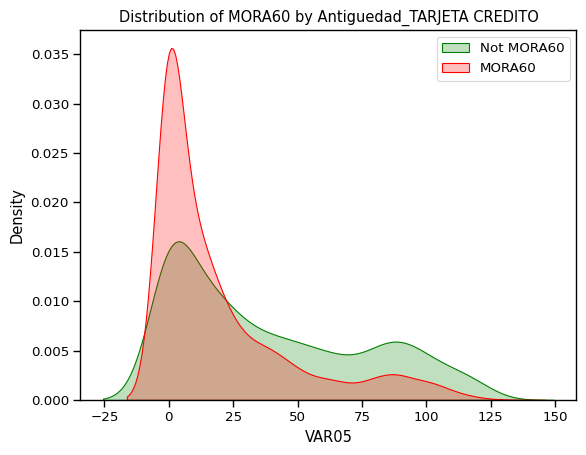

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df2.VAR05[(df["MORA60"] == 0) ],
                color="GREEN", shade = True);
ax = sns.kdeplot(df2.VAR05[(df["MORA60"] == 1) ],
                ax =ax, color="RED", shade= True);
ax.legend(["Not MORA60","MORA60"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('VAR05');
ax.set_title('Distribution of MORA60 by Antiguedad_TARJETA CREDITO');

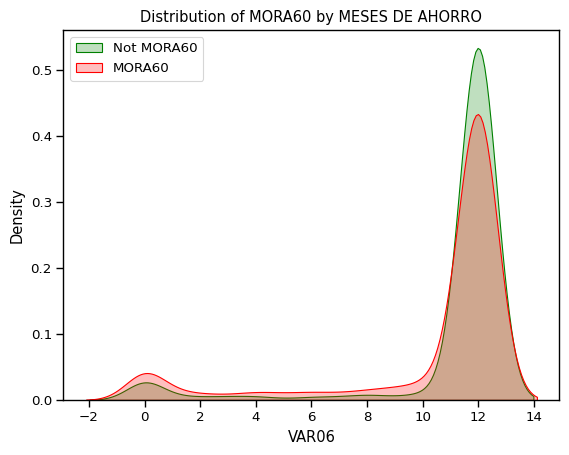

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df2.VAR06[(df["MORA60"] == 0) ],
                color="GREEN", shade = True);
ax = sns.kdeplot(df2.VAR06[(df["MORA60"] == 1) ],
                ax =ax, color="RED", shade= True);
ax.legend(["Not MORA60","MORA60"],loc='upper left');
ax.set_ylabel('Density');
ax.set_xlabel('VAR06');
ax.set_title('Distribution of MORA60 by MESES DE AHORRO');

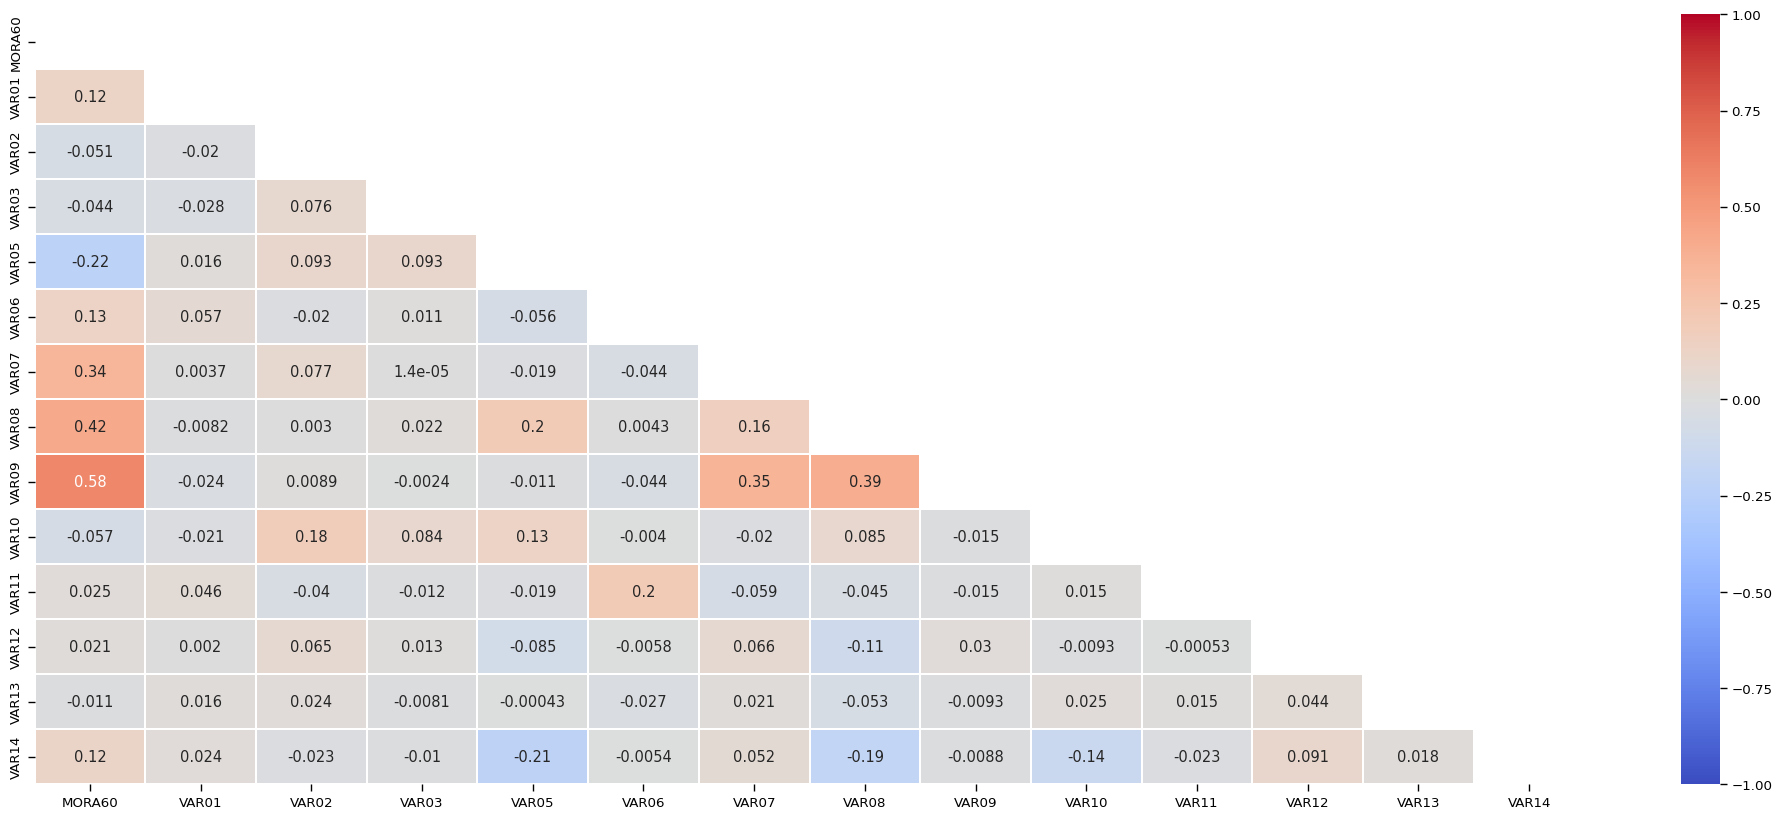

In [ ]:
# Configurar el tamaño de la figura del gráfico
plt.figure(figsize=(25, 10))

# Drop 'VAR04' column before calculating correlation
df_for_corr = df2.drop(columns=['VAR04'], errors='ignore')

# Calcular la matriz de correlación
# Utilizando pd.factorize para convertir variables categóricas en valores numéricos antes de calcular la correlación
corr = df_for_corr.apply(lambda x: pd.factorize(x)[0]).corr()
# Crear una máscara triangular superior para ocultar la mitad inferior de la matriz de correlación
mask = np.triu(np.ones_like(corr, dtype=bool))
# Generar un heatmap utilizando Seaborn
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns,
                 annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

LAS 2 VARIABLES MENOS RELEVANTES PARA EL ANÁLISIS SON LAS SIGUIENTES:
- VAR13: RIESGO SBS
- VAR12: ZONA GEOGRÁFICA

POR LAS SIGUIENTES RAZONES:

--- MENOR RELACIÓN CON NUESTRO TARGET (MORA60)

--- MÍNIMA RELACIÓN CON OTROS FEATURES.

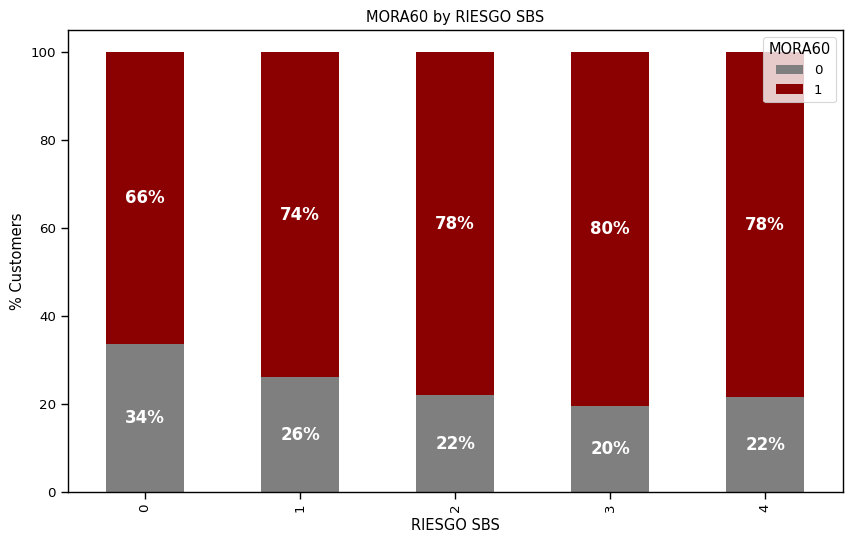

In [ ]:
# Agrupar por 'Contract' y 'Churn' y calcular las proporciones
contract_churn = df2.groupby(['VAR13', 'MORA60']).size().unstack()
# Calcular los porcentajes
contract_churn_perc = contract_churn.div(contract_churn.sum(1), axis=0) * 100
# Crear el gráfico de barras apiladas con porcentajes
ax = contract_churn_perc.plot(kind='bar', stacked=True,  color=['#7f7f7f','#8B0000'], figsize=(10, 6))
# Añadir título y etiquetas
plt.title('MORA60 by RIESGO SBS')
plt.ylabel('% Customers')
plt.xlabel('RIESGO SBS')
plt.legend(title='MORA60')
# Añadir etiquetas de porcentaje en las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}%', (x + width / 2, y + height / 2),
                ha='center', va='center', color='white', fontsize=12, weight='bold')

# Mostrar el gráfico
plt.show()


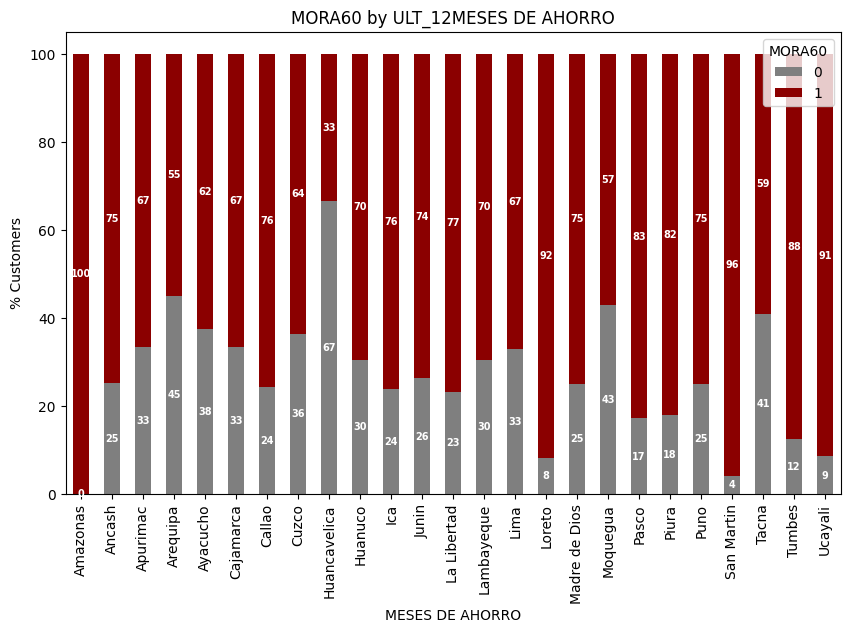

In [ ]:
# Agrupar por 'Contract' y 'Churn' y calcular las proporciones
contract_churn = df2.groupby(['VAR12', 'MORA60']).size().unstack()
# Calcular los porcentajes
contract_churn_perc = contract_churn.div(contract_churn.sum(1), axis=0) * 100
# Crear el gráfico de barras apiladas con porcentajes
ax = contract_churn_perc.plot(kind='bar', stacked=True,  color=['#7f7f7f','#8B0000'], figsize=(10, 6))
# Añadir título y etiquetas
plt.title('MORA60 by ULT_12MESES DE AHORRO')
plt.ylabel('% Customers')
plt.xlabel('MESES DE AHORRO')
plt.legend(title='MORA60')
# Añadir etiquetas de porcentaje en las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2),
                ha='center', va='center', color='white', fontsize=7, weight='bold')

# Mostrar el gráfico
plt.show()


In [ ]:
#Convirtamos todas las variables categóricas en variables dummy
df_dummies = pd.get_dummies(df2)
df_dummies.head()
df_dummies.head()

,MORA60,VAR01,VAR03,VAR04,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,...,VAR12_Puno,VAR12_San Martin,VAR12_Tacna,VAR12_Tumbes,VAR12_Ucayali,VAR14_EDUCACION BASICA,VAR14_PROFESIONAL,VAR14_SIN EDUCACION,VAR14_SUPERIOR,VAR14_TECNICO
0,0,235,30,2007-06-01,93,5,3500.0,0.00,0.00,214,...,False,False,False,False,False,False,True,False,False,False
1,0,18,32,2005-02-01,9,12,900.0,1824.67,1933.75,175,...,False,False,False,False,False,False,False,False,False,True
2,0,0,26,2003-08-01,8,2,2400.0,2797.38,188.29,187,...,False,False,False,False,False,False,True,False,False,False
3,0,0,36,2003-07-01,20,12,2700.0,0.00,0.00,187,...,False,False,False,False,False,False,False,False,False,True
4,0,0,46,2006-11-01,0,1,3100.0,2000.00,11010.65,189,...,False,False,False,False,False,False,False,False,False,True


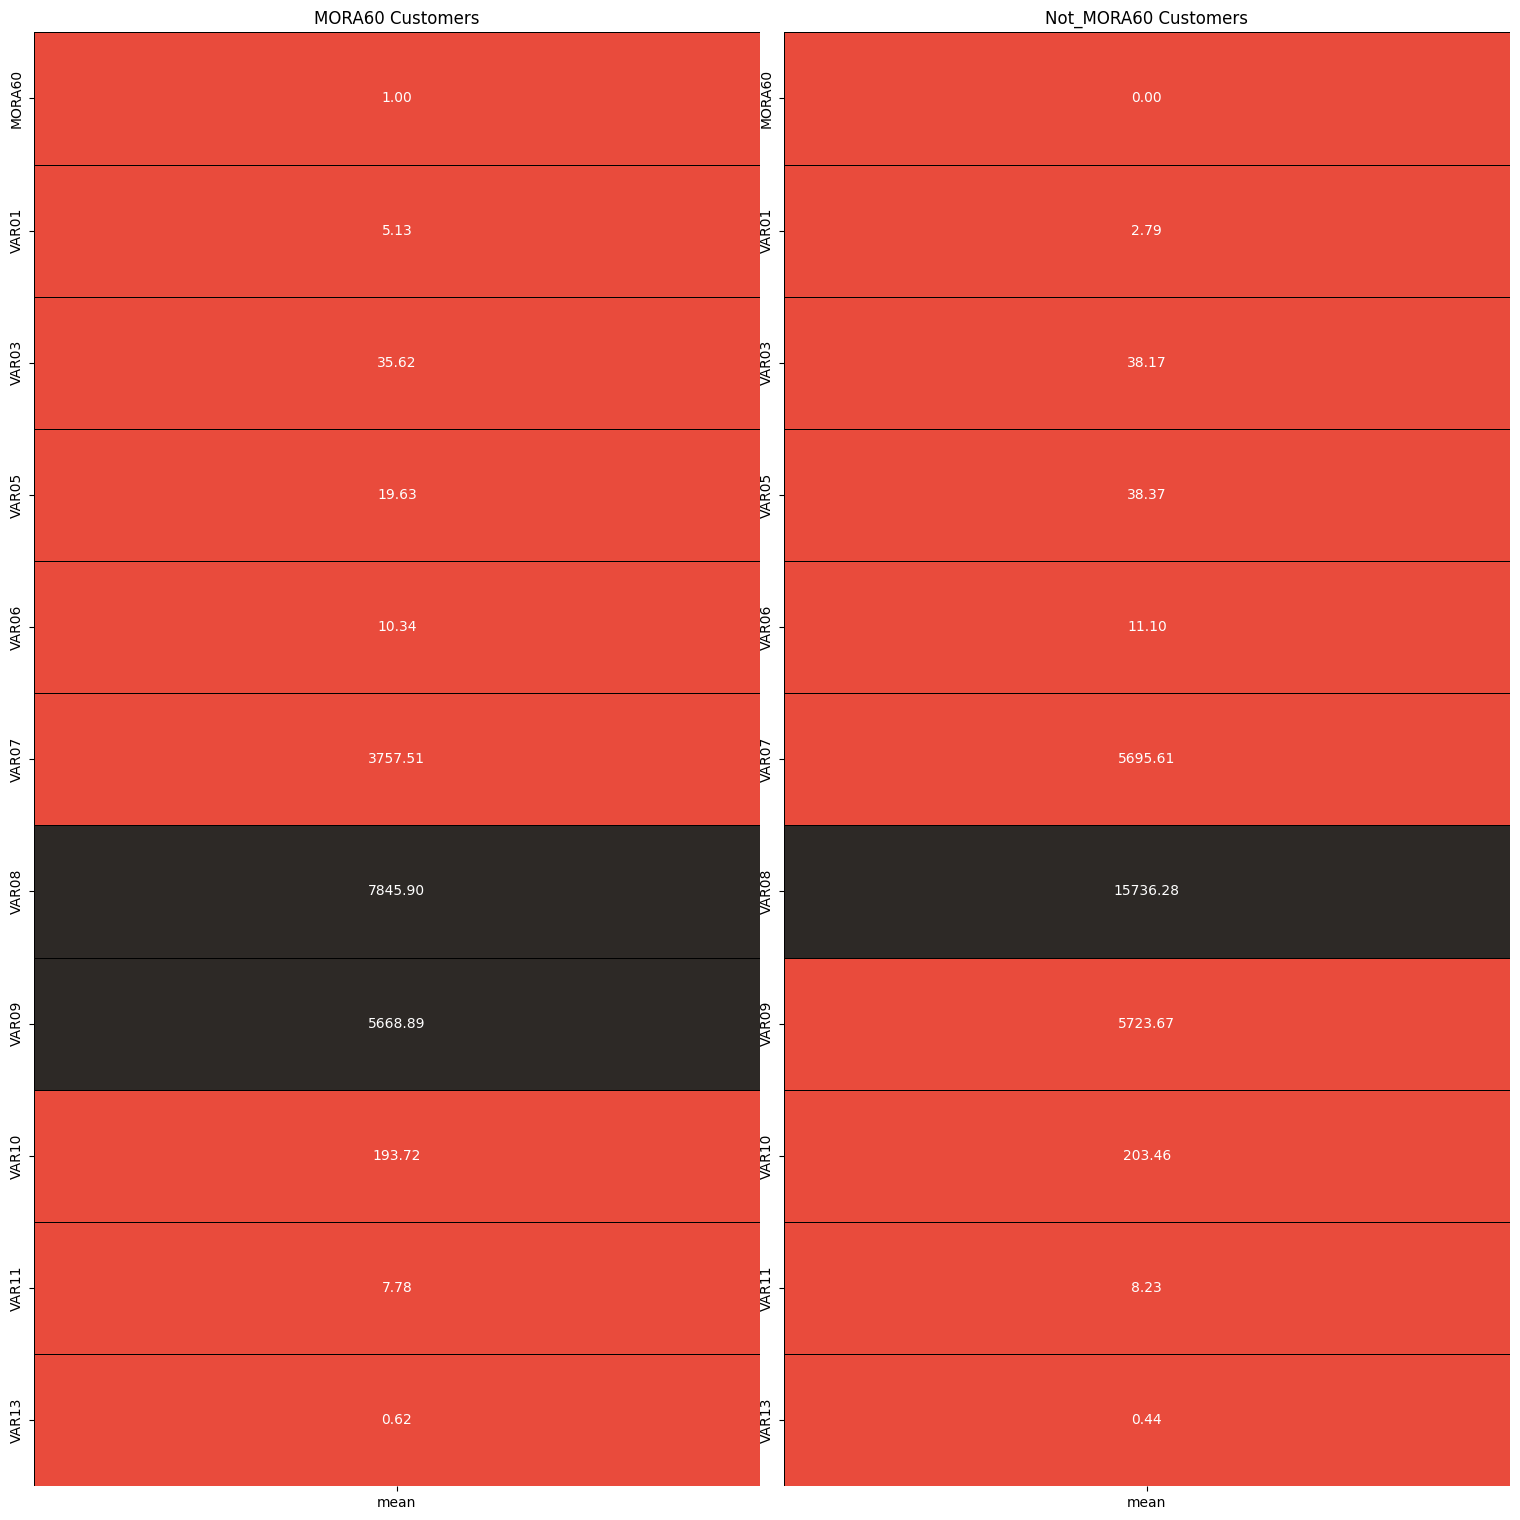

In [ ]:
# Select only numeric columns from the dummy DataFrame
df_numeric = df_dummies.select_dtypes(include=np.number)

# Calculate mean for churned and non-churned customers using only numeric columns
churn_numeric_mean = df_numeric[df_dummies['MORA60'] == 1].mean().to_frame(name='mean')
not_churn_numeric_mean = df_numeric[df_dummies['MORA60'] == 0].mean().to_frame(name='mean')

colors = ['#E94B3C','#2D2926']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,15))
plt.subplot(1,2,1)
sns.heatmap(churn_numeric_mean,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('MORA60 Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn_numeric_mean,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_MORA60 Customers');

fig.tight_layout(pad = 0)

In [ ]:
# Agrupar por 'MORA60' y calcular las estadísticas descriptivas
MORA60_summary = df_dummies.groupby('MORA60').mean().transpose()

# Mostrar el resumen
MORA60_summary.round(2)

MORA60,0,1
VAR01,2.790915,5.134939
VAR03,38.167001,35.620139
VAR04,2001-02-08 05:39:33.547094272,2002-12-17 08:51:07.208357632
VAR05,38.372077,19.629425
VAR06,11.102204,10.342426
VAR07,5695.60652,3757.505438
VAR08,15736.279365,7845.895061
VAR09,5723.672993,5668.891892
VAR10,203.460922,193.724608
VAR11,8.230461,7.778874


In [ ]:
df2.head(3)

,MORA60,VAR01,VAR02,VAR03,VAR04,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14
0,0,235,FAMILIAR,30,2007-06-01,93,5,3500.0,0.00,0.00,214,5,Lima,4,PROFESIONAL
1,0,18,FAMILIAR,32,2005-02-01,9,12,900.0,1824.67,1933.75,175,12,La Libertad,1,TECNICO
2,0,0,FAMILIAR,26,2003-08-01,8,2,2400.0,2797.38,188.29,187,0,Lima,0,PROFESIONAL


In [ ]:
grouped_stats = df2.groupby(['VAR14', 'MORA60']).agg(
    Avg_IngresoMensual=('VAR07', 'mean'),
    Median_IngresoMensual=('VAR07', 'median'),
    Avg_MontoLineaCredito=('VAR08', 'mean'),
    Median_MontoLineaCredito=('VAR08', 'median'),
    Avg_SaldoDeudor=('VAR09', 'mean'),
    Median_SaldoDeudor=('VAR09', 'median')
).reset_index()
display(grouped_stats.round(2))

,VAR14,MORA60,Avg_IngresoMensual,Median_IngresoMensual,Avg_MontoLineaCredito,Median_MontoLineaCredito,Avg_SaldoDeudor,Median_SaldoDeudor
0,EDUCACION BASICA,0,4345.02,2700.00,6165.28,1742.11,6912.90,1943.62
1,EDUCACION BASICA,1,4155.88,1568.24,2133.47,300.00,6429.93,2137.56
2,PROFESIONAL,0,6933.64,4700.00,20447.99,8678.37,6206.81,1557.94
3,PROFESIONAL,1,5107.25,3003.00,12631.11,4975.15,7143.74,2177.28
4,SIN EDUCACION,0,21301.24,30000.00,30903.85,3729.66,6689.86,0.00
5,SIN EDUCACION,1,11205.53,4400.00,18746.06,8642.50,8272.23,1823.77
6,SUPERIOR,0,4836.15,2300.00,11378.76,3183.36,4478.29,1633.89
7,SUPERIOR,1,3958.63,2169.48,6238.01,2808.01,4692.43,1547.19
8,TECNICO,0,2763.78,2098.70,5975.99,1832.34,4727.10,1850.86
9,TECNICO,1,2145.27,1400.00,3130.09,1023.81,4031.18,2240.46


In [ ]:
grouped_stats = df2.groupby([ 'MORA60']).agg(
    Avg_IngresoMensual=('VAR07', 'mean'),
    Median_IngresoMensual=('VAR07', 'median'),
    Avg_MontoLineaCredito=('VAR08', 'mean'),
    Median_MontoLineaCredito=('VAR08', 'median'),
    Avg_SaldoDeudor=('VAR09', 'mean'),
    Median_SaldoDeudor=('VAR09', 'median')
   ).reset_index()
display(grouped_stats.round(2))

,MORA60,Avg_IngresoMensual,Median_IngresoMensual,Avg_MontoLineaCredito,Median_MontoLineaCredito,Avg_SaldoDeudor,Median_SaldoDeudor
0,0,5695.61,3370.0,15736.28,5400.0,5723.67,1644.75
1,1,3757.51,2100.0,7845.90,2299.5,5668.89,2210.88


In [ ]:
import pandas as pd

columns_to_drop = ['VAR02', 'VAR04', 'VAR12', 'VAR13']
df_filtered = df2.drop(columns=columns_to_drop)
described_df = df_filtered.groupby(['VAR14','MORA60']).describe()

# Display the transposed and rounded DataFrame
display(described_df.round(2))

VAR01                                           \
                          count  mean    std  min  25%  50%   75%    max   
VAR14            MORA60                                                    
EDUCACION BASICA 0         27.0  2.41   7.38  0.0  0.0  0.0  1.00   32.0   
                 1        138.0  4.29   9.43  0.0  0.0  0.0  2.00   55.0   
PROFESIONAL      0        968.0  2.86  13.03  0.0  0.0  0.0  0.00  245.0   
                 1       1659.0  5.51  15.80  0.0  0.0  0.0  2.00  245.0   
SIN EDUCACION    0          9.0  2.00   3.71  0.0  0.0  0.0  1.00    9.0   
                 1         17.0  4.65   8.82  0.0  0.0  0.0  2.00   25.0   
SUPERIOR         0         69.0  2.29   7.76  0.0  0.0  0.0  0.00   48.0   
                 1        116.0  6.37  13.46  0.0  0.0  0.0  4.25   81.0   
TECNICO          0        424.0  2.76   7.46  0.0  0.0  0.0  2.00   55.0   
                 1       1516.0  4.71  13.18  0.0  0.0  0.0  2.00  245.0   

                          VAR03         ...   VAR10          VAR11         \
                          count   mean  ...     75%    max   count   mean   
VAR14            MORA60                 ...                                 
EDUCACION BASICA 0         27.0  40.19  ...  210.00  261.0    27.0   7.93   
                 1        138.0  37.77  ...  195.75  254.0   138.0   7.58   
PROFESIONAL      0        968.0  38.73  ...  219.00  266.0   968.0   7.63   
                 1       1659.0  36.64  ...  214.00  257.0  1659.0   6.40   
SIN EDUCACION    0          9.0  48.67  ...  225.00  230.0     9.0   4.00   
                 1         17.0  43.47  ...  211.00  230.0    17.0   5.94   
SUPERIOR         0         69.0  33.87  ...  208.00  250.0    69.0   5.74   
                 1        116.0  34.28  ...  206.25  238.0   116.0   5.34   
TECNICO          0        424.0  37.24  ...  207.50  242.0   424.0  10.12   
                 1       1516.0  34.33  ...  197.00  239.0  1516.0   9.51   

                                                            
                          std  min   25%   50%   75%   max  
VAR14            MORA60                                     
EDUCACION BASICA 0       5.65  0.0   0.0  12.0  12.0  12.0  
                 1       5.56  0.0   0.0  11.0  12.0  12.0  
PROFESIONAL      0       5.42  0.0   0.0  12.0  12.0  12.0  
                 1       5.58  0.0   0.0   9.0  12.0  12.0  
SIN EDUCACION    0       6.00  0.0   0.0   0.0  12.0  12.0  
                 1       5.64  0.0   0.0   6.0  12.0  12.0  
SUPERIOR         0       5.50  0.0   0.0   4.0  12.0  12.0  
                 1       5.81  0.0   0.0   1.0  12.0  12.0  
TECNICO          0       4.01  0.0  11.0  12.0  12.0  12.0  
                 1       4.26  0.0   9.0  12.0  12.0  12.0  

[10 rows x 72 columns]

<a id = "10" ></a>
# <span style="font-family:serif; font-size:28px;"> 7. Data Preprocessing</span>
<a id = "datapreprocessing" ></a>


In [ ]:
df=df2.copy()

In [ ]:
df.head(3)

,MORA60,VAR01,VAR02,VAR03,VAR04,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14
0,0,235,FAMILIAR,30,2007-06-01,93,5,3500.0,0.00,0.00,214,5,Lima,4,PROFESIONAL
1,0,18,FAMILIAR,32,2005-02-01,9,12,900.0,1824.67,1933.75,175,12,La Libertad,1,TECNICO
2,0,0,FAMILIAR,26,2003-08-01,8,2,2400.0,2797.38,188.29,187,0,Lima,0,PROFESIONAL


In [ ]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    # Verificar si el tipo de datos de la serie es 'object'
    if dataframe_series.dtype == 'object':
        # Utilizar LabelEncoder para transformar los valores de la serie en números enteros
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)

    # Devolver la serie procesada
    return dataframe_series


In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,MORA60,VAR01,VAR02,VAR03,VAR04,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14
0,0,235,1,30,2007-06-01,93,5,3500.0,0.00,0.00,214,5,14,4,1
1,0,18,1,32,2005-02-01,9,12,900.0,1824.67,1933.75,175,12,12,1,4
2,0,0,1,26,2003-08-01,8,2,2400.0,2797.38,188.29,187,0,14,0,1
3,0,0,1,36,2003-07-01,20,12,2700.0,0.00,0.00,187,12,1,0,4
4,0,0,1,46,2006-11-01,0,1,3100.0,2000.00,11010.65,189,0,14,0,4


In [ ]:
import matplotlib.pyplot as plt
from tabulate import tabulate

# Establecer el tamaño de la figura
plt.figure(figsize=(14, 7))

# Calcular la correlación de cada variable con respecto a 'Churn' y ordenar en orden descendente
correlation_series = df.corr()['MORA60'].sort_values(ascending=False)

# Imprimir la serie de correlación en formato tabla
table = tabulate(correlation_series.to_frame(), headers=['Correlation'], tablefmt='pretty')

# Mostrar la tabla
print(table)



+--------+------------------------+
|        |      Correlation       |
+--------+------------------------+
| MORA60 |          1.0           |
| VAR04  |  0.14283003813759843   |
| VAR14  |   0.1301245831799249   |
| VAR13  |  0.09145172761898179   |
| VAR01  |  0.07932408342716027   |
| VAR12  |  0.03812969863439904   |
| VAR09  | -0.0023371094896349324 |
| VAR11  |  -0.03937500948605258  |
| VAR02  |  -0.07293350206321887  |
| VAR06  |  -0.10285055630552215  |
| VAR03  |  -0.11970057501925827  |
| VAR07  |  -0.16545134897625222  |
| VAR08  |  -0.1821667514498761   |
| VAR10  |  -0.23026311639388083  |
| VAR05  |  -0.2696733550948053   |
+--------+------------------------+


<Figure size 1400x700 with 0 Axes>

In [ ]:
## Definimos el target : Variable dependiente y features
X = df.drop(columns = ['MORA60','VAR04'])
y = df['MORA60'].values

In [ ]:
X.head(3)

,VAR01,VAR02,VAR03,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14
0,235,1,30,93,5,3500.0,0.00,0.00,214,5,14,4,1
1,18,1,32,9,12,900.0,1824.67,1933.75,175,12,12,1,4
2,0,1,26,8,2,2400.0,2797.38,188.29,187,0,14,0,1


In [ ]:
num_cols = ['VAR01','VAR03','VAR05','VAR06','VAR07','VAR08','VAR09','VAR10','VAR11']
cat_cols_ohe =['VAR02','VAR13', 'VAR14']
cat_cols_le = list(set(X.columns)- set(num_cols) - set(cat_cols_ohe))

In [ ]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40, stratify=y)

# Crear una instancia del StandardScaler
scaler = StandardScaler()

# Estandarizar las características numéricas en el conjunto de entrenamiento
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Estandarizar las características numéricas en el conjunto de prueba usando los parámetros ajustados del conjunto de entrenamiento
X_test[num_cols] = scaler.transform(X_test[num_cols])


<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> 8. Machine Learning Model Evaluations and Predictions</span>
<a id = "modelprediction" ></a>

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = None,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7376938637896157


In [ ]:
X_train.head(3)

,VAR01,VAR02,VAR03,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14
2675,-0.314996,1,1.215905,0.157039,-1.973262,0.132730,-0.358058,-0.332298,-0.809799,-1.510453,14,2,4
2024,-0.314996,1,0.905362,-0.539650,-0.480850,-0.423733,-0.086213,-0.531508,-0.964441,-1.510453,13,1,4
202,-0.314996,3,-0.750868,-0.792991,0.414597,-0.554507,-0.508360,-0.490964,-0.036590,0.770388,10,3,4


In [ ]:
y_train

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
X_test.head(3)

,VAR01,VAR02,VAR03,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14
3273,1.201343,1,-0.750868,0.378712,0.414597,-0.509706,-0.425020,-0.531508,0.788167,0.390248,6,1,4
4966,-0.314996,3,0.491304,0.252042,0.414597,-0.431561,-0.495846,-0.531508,0.427336,0.770388,14,0,1
1349,-0.314996,3,0.801847,1.898761,0.414597,0.132730,-0.411440,-0.331529,0.581978,0.770388,3,0,1


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.64      0.31      0.41       449
           1       0.75      0.93      0.83      1034

    accuracy                           0.74      1483
   macro avg       0.70      0.62      0.62      1483
weighted avg       0.72      0.74      0.70      1483



In [ ]:
prediction_train = model_rf.predict(X_train)

In [ ]:
print(classification_report(y_train, prediction_train))

              precision    recall  f1-score   support

           0       0.75      0.37      0.50      1048
           1       0.78      0.95      0.85      2412

    accuracy                           0.77      3460
   macro avg       0.76      0.66      0.68      3460
weighted avg       0.77      0.77      0.75      3460



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
auc_rf = roc_auc_score(y_test, prediction_test)
print(auc_rf)

0.6153272046628442


In [ ]:
auc_rf_t = roc_auc_score(y_train, prediction_train)
print(auc_rf_t)

0.6591826174471156


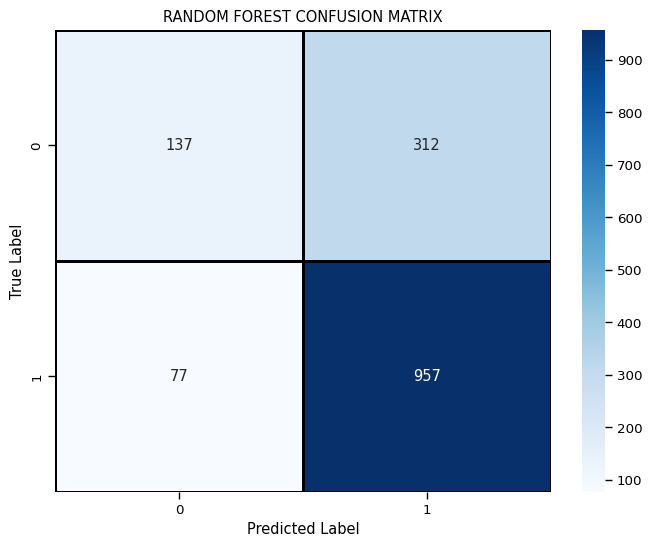

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, prediction_test)

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear un mapa de calor con anotaciones y formatos adicionales
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=1, linecolor="black")

# Configurar etiquetas y título
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("RANDOM FOREST CONFUSION MATRIX")

# Mostrar la matriz de confusión
plt.show()


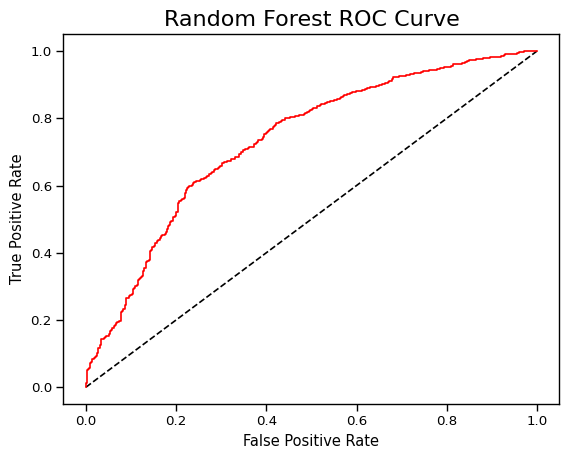

In [ ]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

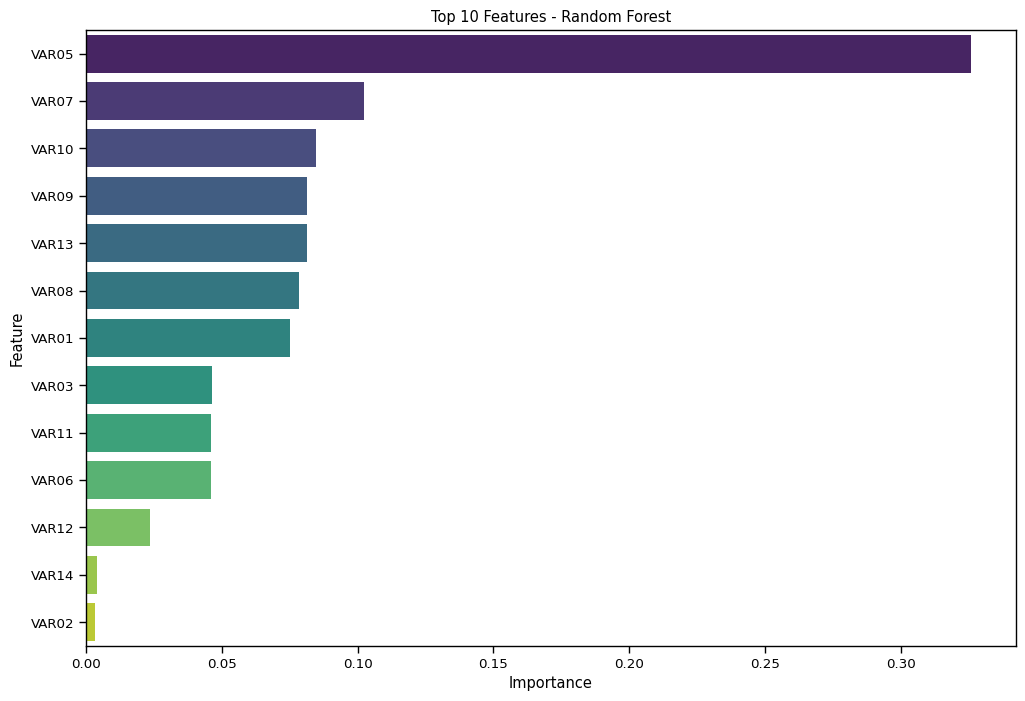

In [ ]:
# Obtener la importancia de las variables
importances = model_rf.feature_importances_

# Crear un DataFrame con las variables y sus importancias
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el top de variables importantes
## print(feature_importance_df.head(10))
top_features = feature_importance_df.head(15)
# Crear un gráfico de barras para visualizar las importancias de las variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Features - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

<a id = "104" ></a>
#### <b>Logistic Regression</b>
<a id = "lr" ></a>

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7349966284558328


In [ ]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.31      0.41       449
           1       0.75      0.92      0.83      1034

    accuracy                           0.73      1483
   macro avg       0.69      0.61      0.62      1483
weighted avg       0.72      0.73      0.70      1483



In [ ]:
auc_rf = roc_auc_score(y_test, lr_pred)
print(auc_rf)

0.613392968686055


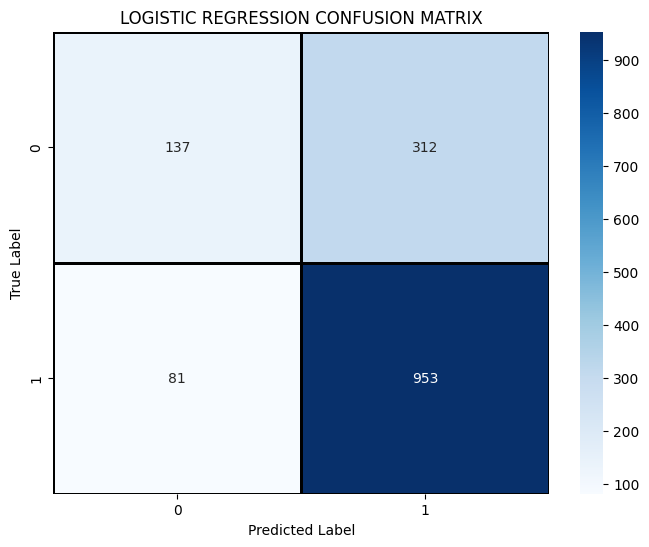

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, lr_pred)

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear un mapa de calor con anotaciones y formatos adicionales
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=1, linecolor="black")

# Configurar etiquetas y título
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX")

# Mostrar la matriz de confusión
plt.show()

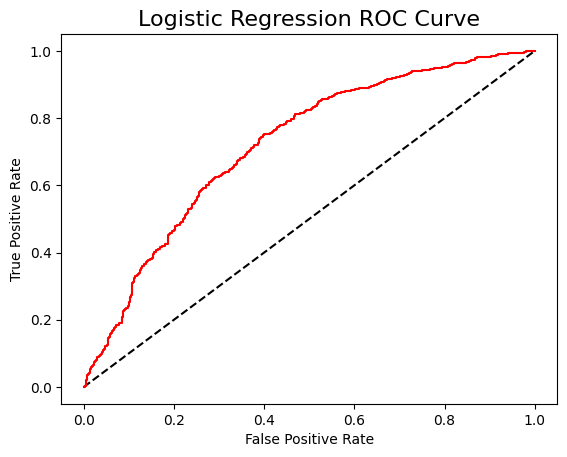

In [ ]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

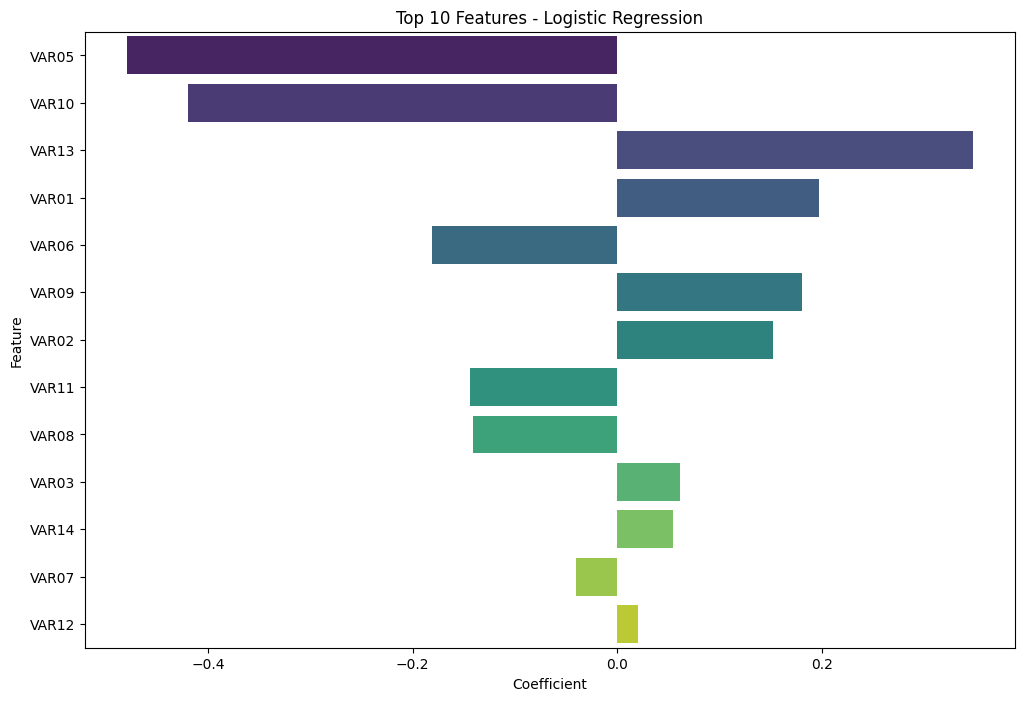

In [ ]:
# Obtener los coeficientes y nombres de las características
coeficients = lr_model.coef_[0]
feature_names = X_train.columns

# Crear un DataFrame para visualizar los coeficientes
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coeficients})

# Ordenar por valor absoluto para obtener las variables más importantes
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Mostrar el top de variables importantes
top_features_logistic = coef_df.head(15)

# Crear un gráfico de barras para visualizar las importancias de las variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=top_features_logistic, palette='viridis')
plt.title('Top 10 Features - Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

[texto del enlace](https://)<a id = "105" ></a>
#### **Decision Tree Classifier**
<a id = "dtc" ></a>

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.6351989211058665


In [ ]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.40      0.42      0.41       449
           1       0.74      0.73      0.74      1034

    accuracy                           0.64      1483
   macro avg       0.57      0.58      0.57      1483
weighted avg       0.64      0.64      0.64      1483



In [ ]:
auc_rf = roc_auc_score(y_test, predictdt_y)
print(auc_rf)

0.5826616637875701


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4943 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   MORA60  4943 non-null   int64         
 1   VAR01   4943 non-null   int64         
 2   VAR02   4943 non-null   object        
 3   VAR03   4943 non-null   int64         
 4   VAR04   4943 non-null   datetime64[ns]
 5   VAR05   4943 non-null   int64         
 6   VAR06   4943 non-null   int64         
 7   VAR07   4943 non-null   float64       
 8   VAR08   4943 non-null   float64       
 9   VAR09   4943 non-null   float64       
 10  VAR10   4943 non-null   int64         
 11  VAR11   4943 non-null   int64         
 12  VAR12   4943 non-null   object        
 13  VAR13   4943 non-null   int64         
 14  VAR14   4943 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(8), object(3)
memory usage: 617.9+ KB


In [ ]:
# Importamos las librerías necesarias
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],   # Función para medir la calidad de la división
    'max_depth': [2, 3, 4, 5, 6, 8, 10], # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10, 20]  # Mínimo de muestras para dividir un nodo
}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(
    clf,
    param_grid=param_grid,
    cv=10,   # validación cruzada en 10 folds
    scoring='roc_auc',  # para balancear tu caso de clasificación binaria
    return_train_score=True
)

grid_search.fit(X_train, y_train)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada (AUC):")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}
Mejor puntuación de validación cruzada (AUC):
0.6768981697291769


In [ ]:
# Modelo decision tree con parametros optimizados
best_clf = grid_search.best_estimator_

In [ ]:
# Predecimos Y en train y test con el mejor modelo encontrado
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

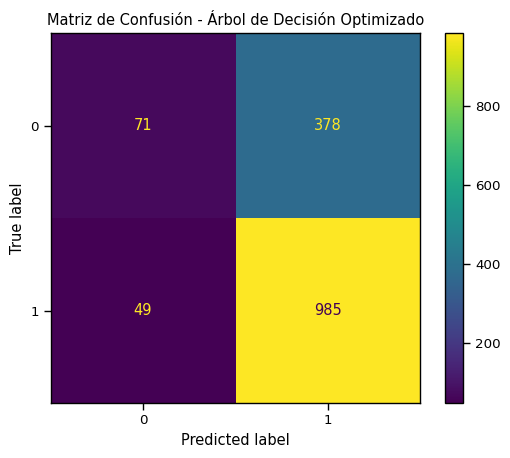

In [ ]:
# Graficamos matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred, labels=best_clf.classes_)
ConfusionMatrixDisplay(cm, display_labels=best_clf.classes_).plot()
plt.title("Matriz de Confusión - Árbol de Decisión Optimizado")
plt.show()

In [ ]:
# Cálculo de las predicciones en Train y Test
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('El accuracy en train es:', accuracy_score(y_train, y_train_pred))
print('El accuracy en test es:', accuracy_score(y_test, y_test_pred))


El accuracy en train es: 0.7378612716763006
El accuracy en test es: 0.7120701281186783


In [ ]:
# Importancia de variables en el modelo optimizado
feature_scores = pd.DataFrame(
    pd.Series(grid_search.best_estimator_.feature_importances_, index=X_train.columns)
    .sort_values(ascending=False)
).T

feature_scores

,VAR05,VAR07,VAR13,VAR06,VAR09,VAR10,VAR08,VAR01,VAR03,VAR12,VAR02,VAR11,VAR14
0,0.358189,0.126559,0.111936,0.090873,0.073802,0.069152,0.06341,0.049271,0.029373,0.027434,0.0,0.0,0.0


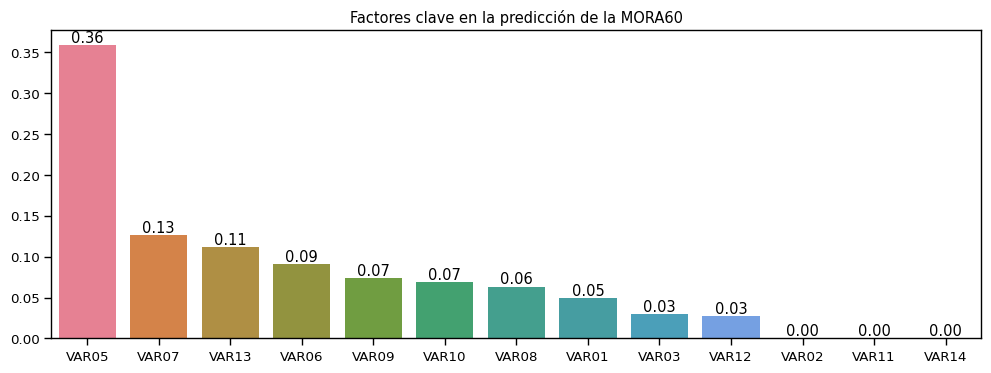

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(data=feature_scores)

for index, value in enumerate(feature_scores.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de la MORA60")
plt.show()

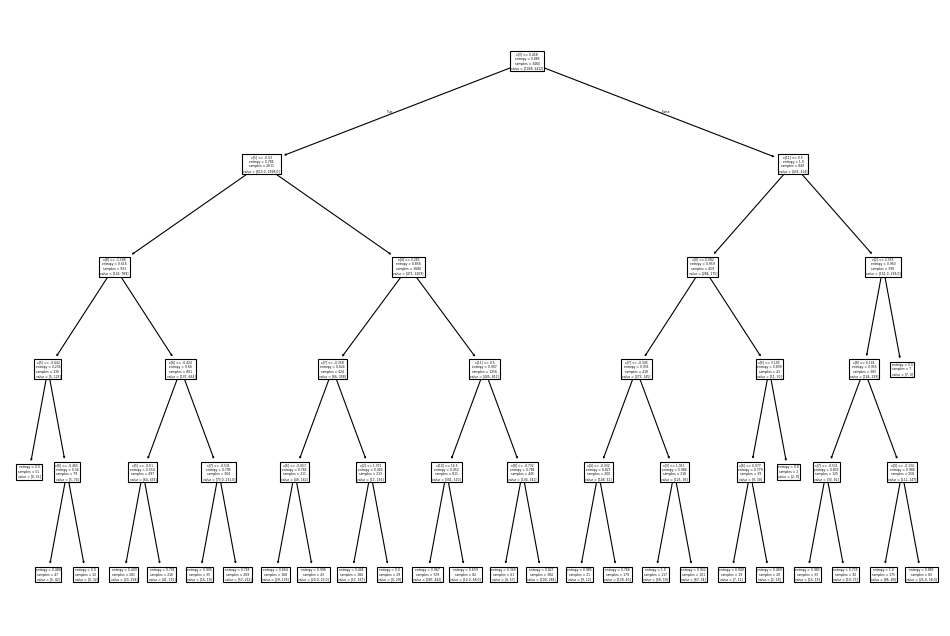

In [ ]:
plt.figure(figsize = (12,8))
from sklearn import tree

tree.plot_tree(best_clf.fit(X_train, y_train));


#### **XG BOOST**
<a id = "dtc" ></a>

In [ ]:
# Importar la librería XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Definir el clasificador XGBoost y los valores de los hiperparámetros a probar
xgb_clf = XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search_xgb = GridSearchCV(xgb_clf, param_grid=param_grid_xgb, cv=10, return_train_score=True)
grid_search_xgb.fit(X_train, y_train)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados para XGBoost:")
print(grid_search_xgb.best_params_)
print("Mejor puntuación de validación cruzada para XGBoost:")
print(grid_search_xgb.best_score_)


Mejores hiperparámetros encontrados para XGBoost:
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Mejor puntuación de validación cruzada para XGBoost:
0.7384393063583814


In [ ]:
# Modelo XGBoost con parámetros optimizados
best_xgb_clf = grid_search_xgb.best_estimator_

# Predecir Y
y_train_pred_xgb = best_xgb_clf.predict(X_train)
y_test_pred_xgb = best_xgb_clf.predict(X_test)

# Calcular las predicciones en Train y test
print('El accuracy en train para XGBoost es:', accuracy_score(y_train, y_train_pred_xgb))
print('El accuracy en test para XGBoost es:', accuracy_score(y_test, y_test_pred_xgb))

El accuracy en train para XGBoost es: 0.769364161849711
El accuracy en test para XGBoost es: 0.7356709372892785


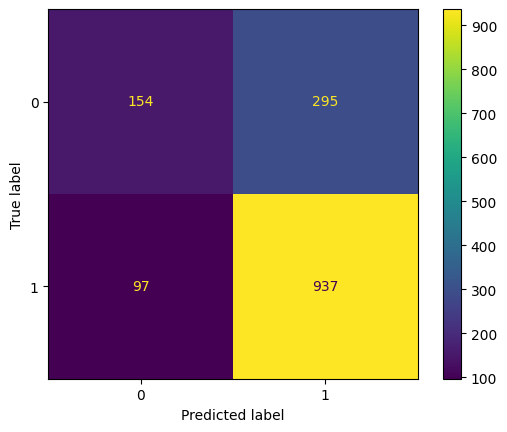

In [ ]:
# Graficar la matriz de confusión
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb, labels=best_xgb_clf.classes_)
ConfusionMatrixDisplay(cm_xgb, display_labels=best_xgb_clf.classes_).plot()

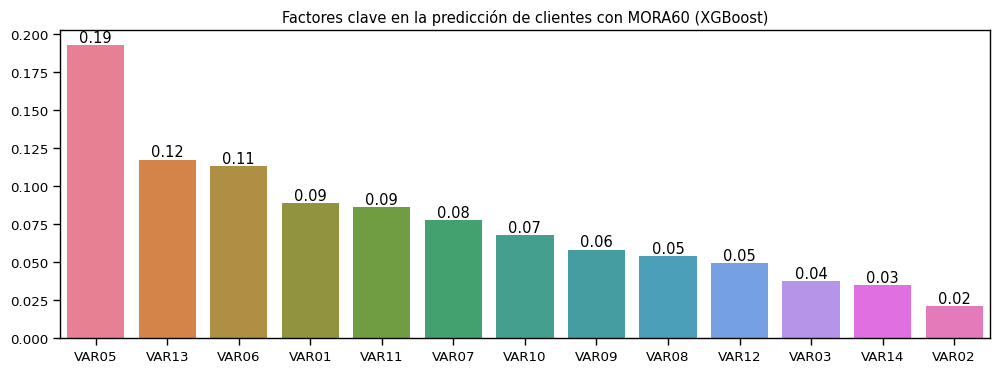

In [ ]:
feature_scores_xgb = pd.DataFrame(pd.Series(best_xgb_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)).T
plt.figure(figsize=(12, 4))
sns.barplot(data=feature_scores_xgb)

for index, value in enumerate(feature_scores_xgb.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')

plt.title("Factores clave en la predicción de clientes con MORA60 (XGBoost)")
plt.show()


#### **LightGBM**
<a id = "dtc" ></a>

In [ ]:
# # LightGBM
# Importar la librería LightGBM
from lightgbm import LGBMClassifier

# Definir el clasificador LightGBM y los valores de los hiperparámetros a probar
lgbm_clf = LGBMClassifier(random_state=42)
param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search_lgbm = GridSearchCV(lgbm_clf, param_grid=param_grid_lgbm, cv=10, return_train_score=True)
grid_search_lgbm.fit(X_train, y_train)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados para LightGBM:")
print(grid_search_lgbm.best_params_)
print("Mejor puntuación de validación cruzada para LightGBM:")
print(grid_search_lgbm.best_score_)

Se han truncado las últimas 5000 líneas del flujo de salida.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [ ]:
# Modelo LightGBM con parámetros optimizados
best_lgbm_clf = grid_search_lgbm.best_estimator_

# Predecir Y
y_train_pred_lgbm = best_lgbm_clf.predict(X_train)
y_test_pred_lgbm = best_lgbm_clf.predict(X_test)

# Calcular las predicciones en Train y test
print('El accuracy en train para LightGBM es:', accuracy_score(y_train, y_train_pred_lgbm))
print('El accuracy en test para LightGBM es:', accuracy_score(y_test, y_test_pred_lgbm))

El accuracy en train para LightGBM es: 0.7982658959537572
El accuracy en test para LightGBM es: 0.7403910991233985


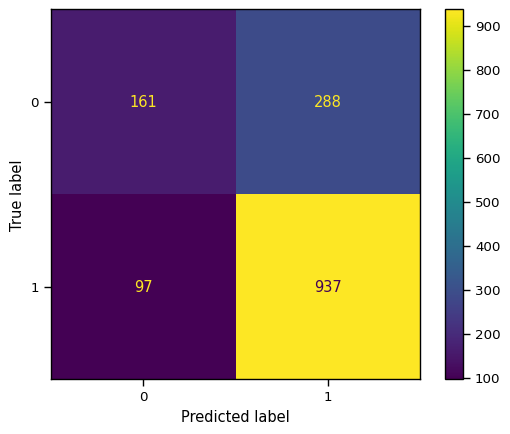

In [ ]:
# Graficar la matriz de confusión
cm_lgbm = confusion_matrix(y_test, y_test_pred_lgbm, labels=best_lgbm_clf.classes_)
ConfusionMatrixDisplay(cm_lgbm, display_labels=best_lgbm_clf.classes_).plot()

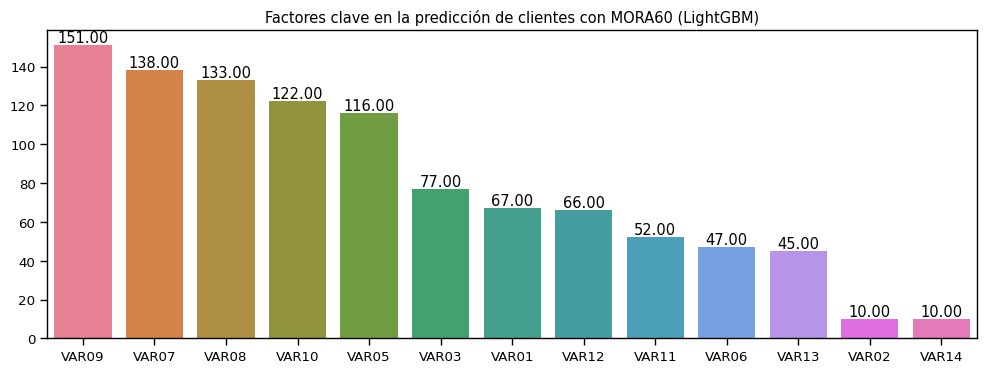

In [ ]:
feature_scores_lgbm = pd.DataFrame(pd.Series(best_lgbm_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)).T
plt.figure(figsize=(12, 4))
sns.barplot(data=feature_scores_lgbm)

for index, value in enumerate(feature_scores_lgbm.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')

plt.title("Factores clave en la predicción de clientes con MORA60 (LightGBM)")
plt.show()


#### **Auto ML**
<a id = "dtc" ></a>

In [ ]:
# Ver versión actual de Python
%pip install condacolab

  Using cached condacolab-0.1.10-py3-none-any.whl.metadata (5.5 kB)
Using cached condacolab-0.1.10-py3-none-any.whl (7.2 kB)


In [ ]:
# Instalar condacolab para manejar entornos con conda

import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
# Crear entorno con Python 3.11
!mamba create -n pycaret-311 -y python=3.11


Looking for: ['python=3.11']

[+] 0.0s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  conda-forge/linux-64                                          No change
[+] 0.2s
conda-forge/noarch   1%[+] 0.3s
conda-forge/noarch   7%[+] 0.4s
conda-forge/noarch  17%[+] 0.5s
conda-forge/noarch  21%[+] 0.6s
conda-forge/noarch  39%[+] 0.7s
conda-forge/noarch  61%[+] 0.8s
conda-forge/noarch  76%[+] 0.9s
conda-forge/noarch  90%[+] 1.0s
conda-forge/noarch  98%conda-forge/noarch                                
Transaction

  Prefix: /usr/local/envs/pycaret-311

  Updating specs:

   - python=3.11


  Package              Version  Build               Channel           Size
────────────────────────────────────────────────────────────────────────────
  Install:
────────────────────────────────────────────────────────────────────────────

  + ld_impl_linux-64      2.44  h1423503_1          conda-forge     Cached
  + _libgcc_mutex          0.1  

In [ ]:
# Instalar pycaret dentro del entorno
!mamba run -n pycaret-311 pip install -q pycaret


CondaError: KeyboardInterrupt



In [ ]:
# Validación
!mamba run -n pycaret-311 python - <<'PY'

/bin/bash: line 1: warning: here-document at line 1 delimited by end-of-file (wanted `PY')

CondaError: KeyboardInterrupt



In [ ]:
%%writefile /tmp/test_pycaret.py
from pycaret.classification import setup, compare_models
from sklearn.datasets import load_iris
import pandas as pd

# Dataset de prueba
X, y = load_iris(return_X_y=True, as_frame=True)
df = pd.concat([X, y.rename('target')], axis=1)

# Setup y comparación
s = setup(df, target='target', session_id=42, verbose=False)
best = compare_models()
print(best)

Overwriting /tmp/test_pycaret.py


In [ ]:
!mamba run -n pycaret-311 python /tmp/test_pycaret.py


                                    Model  Accuracy     AUC  Recall   Prec.  \
qda       Quadratic Discriminant Analysis    0.9809  0.0000  0.9809  0.9852   
nb                            Naive Bayes    0.9727  0.9974  0.9727  0.9806   
lda          Linear Discriminant Analysis    0.9718  0.0000  0.9718  0.9780   
et                 Extra Trees Classifier    0.9718  1.0000  0.9718  0.9780   
lr                    Logistic Regression    0.9618  0.0000  0.9618  0.9705   
ada                  Ada Boost Classifier    0.9618  0.0000  0.9618  0.9705   
knn                K Neighbors Classifier    0.9527  0.9888  0.9527  0.9595   
rf               Random Forest Classifier    0.9518  0.9958  0.9518  0.9660   
gbc          Gradient Boosting Classifier    0.9518  0.0000  0.9518  0.9660   
lightgbm  Light Gradient Boosting Machine    0.9427  0.9739  0.9427  0.9520   
dt               Decision Tree Classifier    0.9318  0.9500  0.9318  0.9460   
ridge                    Ridge Classifier    0.8782 

In [ ]:
%%writefile /tmp/inkabank_pycaret.py
from pycaret.classification import setup, compare_models
import pandas as pd

# Cargar tu dataset
df = pd.read_excel("/content/caso_TC.XLSX")

# Configuración de PyCaret (MORA60 es tu variable objetivo)
s = setup(data=df, target='MORA60', session_id=123, silent=True, verbose=False)

# Comparar modelos
best = compare_models()
print(best)

Overwriting /tmp/inkabank_pycaret.py


In [ ]:
!mamba run -n pycaret-311 python /tmp/inkabank_pycaret.py

Traceback (most recent call last):
  File "/usr/local/envs/pycaret-311/lib/python3.11/site-packages/pandas/compat/_optional.py", line 132, in import_optional_dependency
    module = importlib.import_module(name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/envs/pycaret-311/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1140, in _find_and_load_unlocked
ModuleNotFoundError: No module named 'openpyxl'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/tmp/inkabank_pycaret.py", line 5, in <module>
    df = pd.read_excel("/content/caso_TC.XLSX")
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
!mamba run -n pycaret-311 pip install -q openpyxl

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Guardamos todos los modelos en un diccionario
models = {
    "Random Forest": model_rf,
    "Decision Tree": dt_model,   # o tu modelo optimizado si lo tienes
    "Logistic Regression": lr_model,
    "XGBoost": best_xgb_clf,
    "LightGBM": best_lgbm_clf
}

# Comparación automática
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_pred)
    }

# Pasamos los resultados a un DataFrame para ver la tabla comparativa
comparison_df = pd.DataFrame(results).T
print(comparison_df)

                     Accuracy  Precision    Recall        F1   ROC_AUC
Random Forest        0.737694   0.754137  0.925532  0.831090  0.615327
Decision Tree        0.647336   0.747338  0.746615  0.746976  0.582662
Logistic Regression  0.734997   0.753360  0.921663  0.829056  0.613393
XGBoost              0.735671   0.760552  0.906190  0.827008  0.624587
LightGBM             0.740391   0.764898  0.906190  0.829571  0.632382


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Diccionario de modelos ya entrenados
models = {
    "Random Forest": model_rf,
    "Decision Tree": dt_model,
    "Logistic Regression": lr_model,
    "XGBoost": best_xgb_clf,
    "LightGBM": best_lgbm_clf
}

# Crear lista con resultados
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)

    # ROC-AUC con probabilidades si el modelo lo soporta
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = y_pred

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_proba)
    })

# Pasar a DataFrame
comparison_df = pd.DataFrame(results)

# Ordenar por la métrica que quieras (ej. F1)
metric = "Accuracy"
comparison_df = comparison_df.sort_values(by=metric, ascending=False).reset_index(drop=True)

# Mostrar el cuadro ordenado
print("Tabla comparativa de modelos ordenada por", metric)
print(comparison_df)

# Guardar el mejor modelo según la métrica
best_model_name = comparison_df.loc[0, "Model"]
best_model = models[best_model_name]

print("\nEl mejor modelo según", metric, "es:", best_model_name)

Tabla comparativa de modelos ordenada por Accuracy
                 Model  Accuracy  Precision    Recall        F1   ROC_AUC
0             LightGBM  0.740391   0.764898  0.906190  0.829571  0.735843
1        Random Forest  0.737694   0.754137  0.925532  0.831090  0.732048
2              XGBoost  0.735671   0.760552  0.906190  0.827008  0.730011
3  Logistic Regression  0.734997   0.753360  0.921663  0.829056  0.720053
4        Decision Tree  0.647336   0.747338  0.746615  0.746976  0.582662

El mejor modelo según Accuracy es: LightGBM


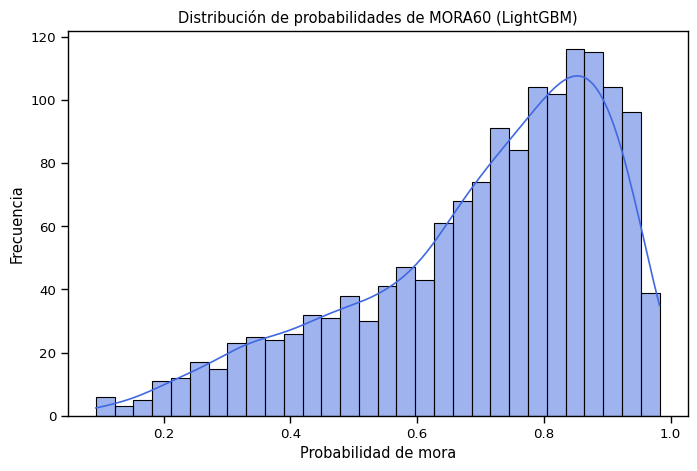

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu modelo entrenado se llama "model"
# y tus datos de test son "X_test" y "y_test"

# 1. Obtener las probabilidades de mora (clase 1)
y_proba = model.predict_proba(X_test)[:, 1]

# 2. Graficar la distribución de probabilidades
plt.figure(figsize=(8,5))
sns.histplot(y_proba, bins=30, kde=True, color="royalblue")
plt.title("Distribución de probabilidades de MORA60 (LightGBM)")
plt.xlabel("Probabilidad de mora")
plt.ylabel("Frecuencia")
plt.show()

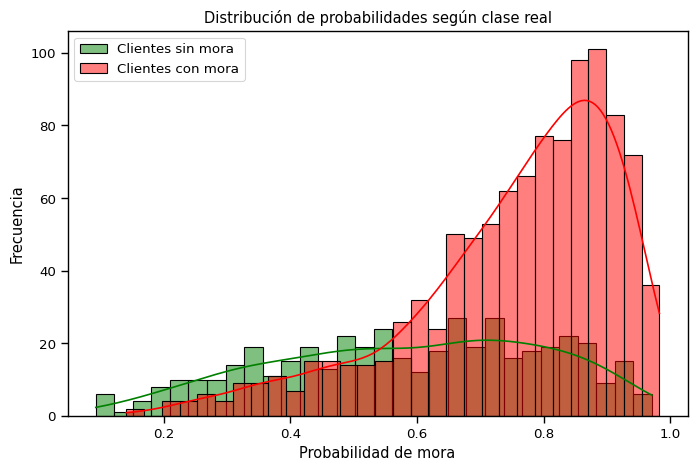

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(y_proba[y_test==0], bins=30, color="green", label="Clientes sin mora", kde=True)
sns.histplot(y_proba[y_test==1], bins=30, color="red", label="Clientes con mora", kde=True)
plt.title("Distribución de probabilidades según clase real")
plt.xlabel("Probabilidad de mora")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [ ]:
#INSTALACION PYCARET
#!pip install pycaret

## **Hacemos predicciones para un nuevo data set**

In [ ]:
total_data = df.drop(columns = ['MORA60','VAR04'])

In [ ]:
total_data.head(2)

,VAR01,VAR02,VAR03,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14
0,235,1,30,93,5,3500.0,0.00,0.00,214,5,14,4,1
1,18,1,32,9,12,900.0,1824.67,1933.75,175,12,12,1,4


In [ ]:
num_cols = ['VAR01','VAR03','VAR05','VAR06','VAR07','VAR08','VAR09','VAR10','VAR11']
cat_cols_ohe =['VAR02','VAR13', 'VAR14']
cat_cols_le = list(set(X.columns)- set(num_cols) - set(cat_cols_ohe))



In [ ]:
# Estandarizar las características numéricas en el conjunto de entrenamiento
total_data[num_cols] = scaler.fit_transform(total_data[num_cols])

In [ ]:
total_data.head(2)

,VAR01,VAR02,VAR03,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14
0,16.981546,1,-0.653752,2.119734,-1.641701,-0.156891,-0.514284,-0.527883,0.891802,-0.553267,14,4,1
1,0.999778,1,-0.449182,-0.510585,0.420542,-0.639938,-0.422603,-0.348339,-1.115518,0.775043,12,1,4


In [ ]:
##Hacemos predicciones
lgb_pred_total =best_lgbm_clf.predict(total_data)


NameError: name 'best_lgbm_clf' is not defined

In [ ]:
lr_pred_total

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Probabilidades
probabilities = best_lgbm_clf.predict_proba(total_data)
# La salida de predict_proba es una matriz donde cada fila representa una instancia y cada columna representa la probabilidad
# de pertenencia a cada clase. Puedes acceder a las probabilidades de la clase positiva (1) de la siguiente manera:
probabilities_positive_class = probabilities[:, 1]

In [ ]:
# Ahora puedes combinar las predicciones y las probabilidades en un DataFrame o hacer lo que necesites con ellos
result_df = pd.DataFrame({'Predictions': lr_pred_total, 'Probabilities_Positive_Class': probabilities_positive_class})

In [ ]:
result_df.head(10)

,Predictions,Probabilities_Positive_Class
0,0,0.328572
1,0,0.815838
2,0,0.772563
3,0,0.556911
4,1,0.897293
5,0,0.785981
6,0,0.642982
7,1,0.664968
8,0,0.646996
9,0,0.837159


In [ ]:
# Receteamos
df = df.reset_index(drop=True)
result_df = result_df.reset_index(drop=True)

# Corrección en la selección de columnas
df_concatenado = pd.concat([df, result_df[['Predictions', 'Probabilities_Positive_Class']]], axis=1)


In [ ]:
df_concatenado.tail()

,MORA60,VAR01,VAR02,VAR03,VAR04,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14,Predictions,Probabilities_Positive_Class
4938,1,0,1,76,2000-01-01,90,12,30000.0,58083.42,19548.24,225,0,14,0,2,0,0.384520
4939,1,0,1,33,2000-02-01,44,12,30000.0,339.98,0.00,214,0,22,0,1,0,0.402092
4940,1,0,1,38,1992-09-01,102,12,8500.0,72685.20,57094.38,197,12,19,1,1,0,0.800210
4941,1,0,3,45,1990-01-01,87,12,30000.0,32161.05,26901.42,224,12,14,0,1,0,0.444580
4942,1,0,3,57,1983-03-01,68,12,16500.0,3583.96,4503.68,233,12,14,0,1,0,0.248305


In [ ]:
# Agrupar por las columnas "Churn" y "Predictions" y contar
grupo_counts = df_concatenado.groupby(['MORA60', 'Predictions']).size().reset_index(name='Counts')

# Mostrar el DataFrame resultante
grupo_counts


,MORA60,Predictions,Counts
0,0,0,1130
1,0,1,367
2,1,0,2035
3,1,1,1411


In [ ]:
# 1. Calcula los deciles
df_concatenado['Predictions_Deciles'] = pd.qcut(df_concatenado['Probabilities_Positive_Class'], q=10, labels=False, duplicates='drop')

# 2. Agrupa por deciles y cuenta la cantidad de casos en cada grupo
deciles_counts = df_concatenado.groupby('Predictions_Deciles').size().reset_index(name='Counts')

# Muestra el DataFrame resultante
print(deciles_counts)

   Predictions_Deciles  Counts
0                    0     495
1                    1     494
2                    2     494
3                    3     495
4                    4     494
5                    5     494
6                    6     494
7                    7     494
8                    8     494
9                    9     495


In [ ]:
# Agrupa por 'Predictions_Deciles' y muestra los valores de 'Churn' y 'Predictions'
grouped_deciles = df_concatenado.groupby('Predictions_Deciles').agg({
    'MORA60': ['mean', 'sum', 'count'],
    'Predictions': ['mean', 'sum', 'count'],
    'Probabilities_Positive_Class': ['mean']
}).reset_index()

# Renombra las columnas para mayor claridad
grouped_deciles.columns = ['Predictions_Deciles', 'MORA_Mean', 'MORA_Sum', 'MORA_Count','Probabilities_Positive_Class_mean',
                            'Predictions_Mean', 'Predictions_Sum', 'Predictions_Count']

# Muestra el DataFrame resultante
grouped_deciles

,Predictions_Deciles,MORA_Mean,MORA_Sum,MORA_Count,Probabilities_Positive_Class_mean,Predictions_Mean,Predictions_Sum,Predictions_Count
0,0,0.341414,169,495,0.000000,0,495,0.320419
1,1,0.467611,231,494,0.578947,286,494,0.507486
2,2,0.558704,276,494,1.000000,494,494,0.611147
3,3,0.712551,352,494,1.000000,494,494,0.672144
4,4,0.727273,360,495,1.000000,495,495,0.719924
5,5,0.759109,375,494,1.000000,494,494,0.759064
6,6,0.811741,401,494,1.000000,494,494,0.790928
7,7,0.836032,413,494,1.000000,494,494,0.821211
8,8,0.874494,432,494,1.000000,494,494,0.857087
9,9,0.882828,437,495,1.000000,495,495,0.913513
